# General Imports

In [1]:
from common import ANNOTATIONSCOREMAP
from annotation_parser import _initialDataFrame

# 1. Exploring Roman Numeral Annotations

In [2]:
import pandas as pd
import music21
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
pd.set_option('display.max_rows', 6000)

In [3]:
dfAll = pd.DataFrame({
    'offset': [],
    'genre': [],
    'composer': [],
    'work': [],
    'movement': [],
    'measure': [],
    'duration': [],
    'isOnset': [],
    'pitchNames': [],
    'bass': [],
    'root': [],
    'inversion': [],
    'quality': [],
    'pcset': [],
    'localKey': [],
    'tonicizedKey': [],
    'degree1': [],
    'degree2': []
})
for score in ANNOTATIONSCOREMAP:
    print(score)
    _, _, genre, composer, work, movement, _ = score.split('/')
    s = music21.converter.parse(score, format="romantext")
    df = _initialDataFrame(s)
    df['genre'] = genre
    df['composer'] = composer
    df['work'] = work
    df['movement'] = movement
    df['offset'] = df.index
    dfAll = dfAll.append(df, ignore_index=True)

When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op002_No1/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op002_No2/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op002_No3/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op007/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op010_No1/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op010_No2/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op010_No3/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op013(Pathetique)/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op014_No1/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op014_No2/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op022/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op026/1/analysis.txt
When-in-Rome/Corpus/Piano_Sonata

In [4]:
dfAll

,offset,genre,composer,work,movement,measure,duration,isOnset,pitchNames,bass,root,inversion,quality,pcset,localKey,tonicizedKey,degree1,degree2,romanNumeral
0,0.0,Piano_Sonatas,"Beethoven,_Ludwig_van",Op002_No1,1,0.0,1.0,1.0,"(F, A-, C)",F,F,0.0,minor triad,"(0, 5, 8)",f,None,1,None,i
1,1.0,Piano_Sonatas,"Beethoven,_Ludwig_van",Op002_No1,1,1.0,4.0,1.0,"(F, A-, C)",F,F,0.0,minor triad,"(0, 5, 8)",f,None,1,None,i
2,5.0,Piano_Sonatas,"Beethoven,_Ludwig_van",Op002_No1,1,2.0,4.0,1.0,"(F, A-, C)",F,F,0.0,minor triad,"(0, 5, 8)",f,None,1,None,i
3,9.0,Piano_Sonatas,"Beethoven,_Ludwig_van",Op002_No1,1,3.0,4.0,1.0,"(E, G, B-, C)",E,C,1.0,dominant seventh chord,"(0, 4, 7, 10)",f,None,5,None,V7
4,13.0,Piano_Sonatas,"Beethoven,_Ludwig_van",Op002_No1,1,4.0,4.0,1.0,"(E, G, B-, C)",E,C,1.0,dominant seventh chord,"(0, 4, 7, 10)",f,None,5,None,V7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92045,1148.0,Orchestral,"Haydn,_Franz_Joseph",Symphony_104,1,288.0,2.0,1.0,"(D, F#, A)",D,D,0.0,major triad,"(2, 6, 9)",D,None,1,None,I
92046,1150.0,Orchestral,"Haydn,_Franz_Joseph",Symphony_104,1,288.0,2.0,1.0,"(G, B, D)",G,G,0.0,major triad,"(2, 7, 11)",D,None,4,None,IV
92047,1152.0,Orchestral,"Haydn,_Franz_Joseph",Symphony_104,1,289.0,2.0,1.0,"(A, D, F#)",A,D,2.0,major triad,"(2, 6, 9)",D,None,1,None,I
92048,1154.0,Orchestral,"Haydn,_Franz_Joseph",Symphony_104,1,289.0,2.0,1.0,"(A, C#, E, G)",A,A,0.0,dominant seventh chord,"(1, 4, 7, 9)",D,None,5,None,V7


## Roman Numeral

<AxesSubplot:>

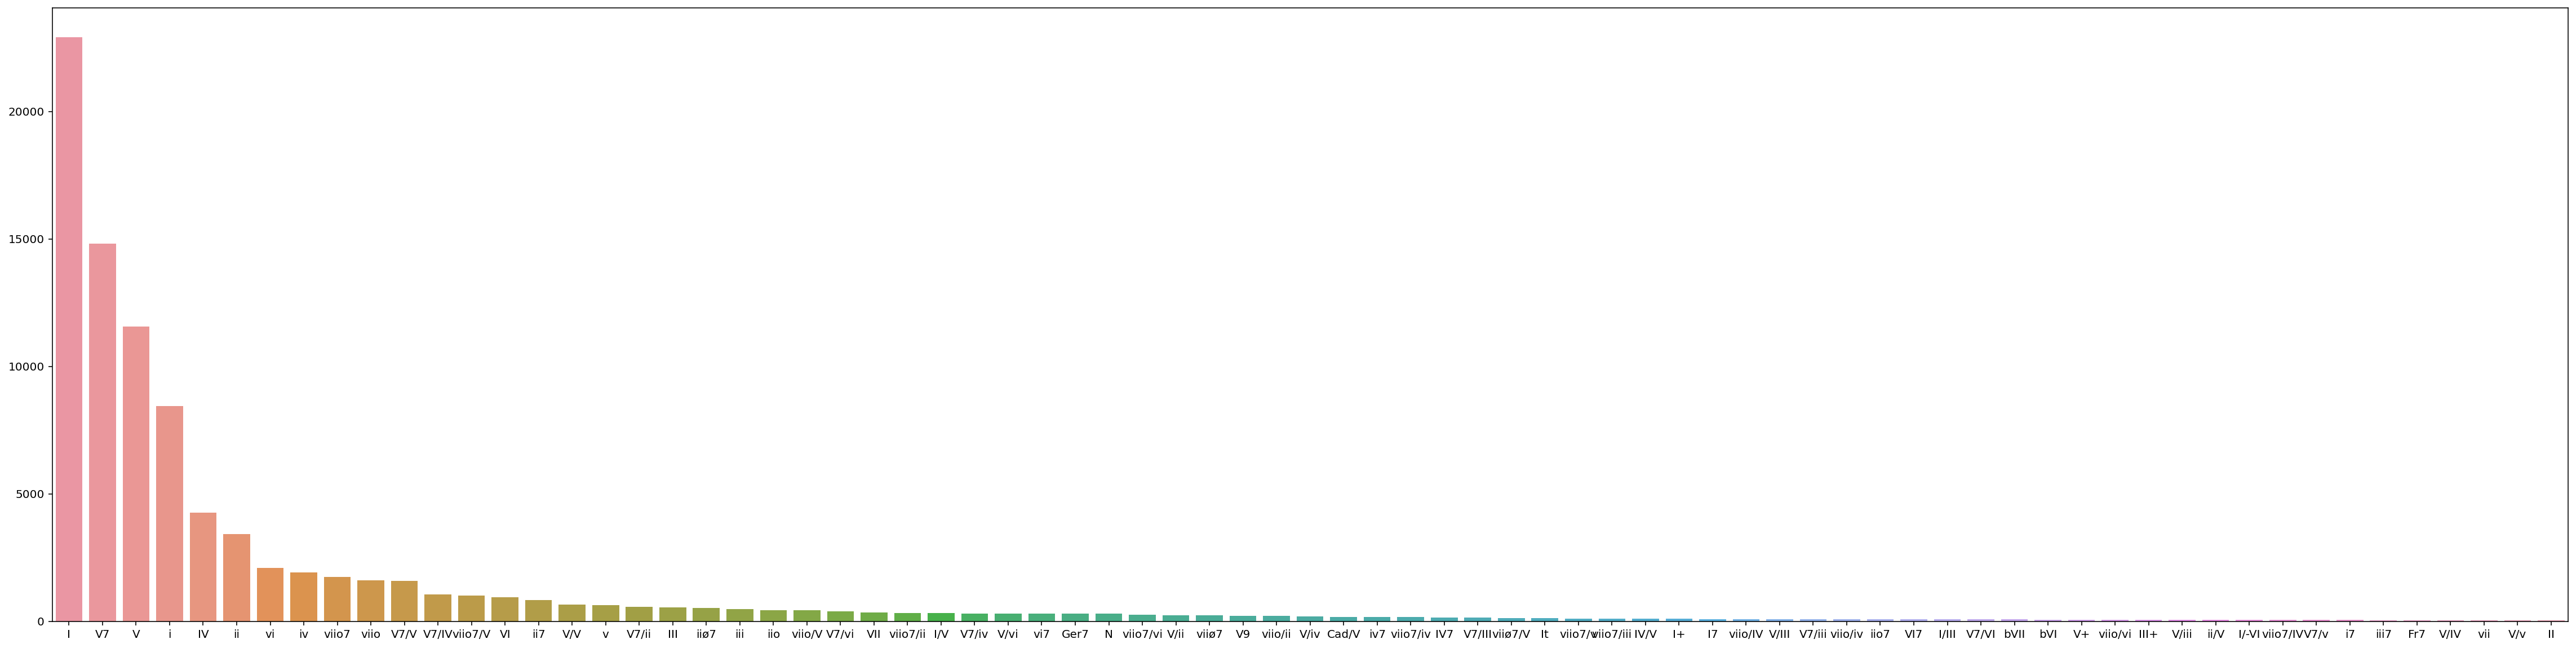

In [26]:
N = 75
d = dfAll.romanNumeral.value_counts().to_dict()
x, y = list(d.keys()), list(d.values())
plt.figure(figsize=(40, 10))
sns.barplot(x=x[:N], y=y[:N])

Number of classes

In [27]:
len(d)

501

Coverage of N most common classes

In [28]:
covered = sum(list(d.values())[:N])
total = sum(d.values())
print("The {} most common classes account for {:.0%} of the annotations in the dataset; or {} annotations out of {}".format(N, covered/total, covered, total))

The 75 most common classes account for 98% of the annotations in the dataset; or 89839 annotations out of 92050


In [29]:
list(d.keys())[:N]

['I',
 'V7',
 'V',
 'i',
 'IV',
 'ii',
 'vi',
 'iv',
 'viio7',
 'viio',
 'V7/V',
 'V7/IV',
 'viio7/V',
 'VI',
 'ii7',
 'V/V',
 'v',
 'V7/ii',
 'III',
 'iiø7',
 'iii',
 'iio',
 'viio/V',
 'V7/vi',
 'VII',
 'viio7/ii',
 'I/V',
 'V7/iv',
 'V/vi',
 'vi7',
 'Ger7',
 'N',
 'viio7/vi',
 'V/ii',
 'viiø7',
 'V9',
 'viio/ii',
 'V/iv',
 'Cad/V',
 'iv7',
 'viio7/iv',
 'IV7',
 'V7/III',
 'viiø7/V',
 'It',
 'viio7/v',
 'viio7/iii',
 'IV/V',
 'I+',
 'I7',
 'viio/IV',
 'V/III',
 'V7/iii',
 'viio/iv',
 'iio7',
 'VI7',
 'I/III',
 'V7/VI',
 'bVII',
 'bVI',
 'V+',
 'viio/vi',
 'III+',
 'V/iii',
 'ii/V',
 'I/-VI',
 'viio7/IV',
 'V7/v',
 'i7',
 'iii7',
 'Fr7',
 'V/IV',
 'vii',
 'V/v',
 'II']

## Local Key

<AxesSubplot:>

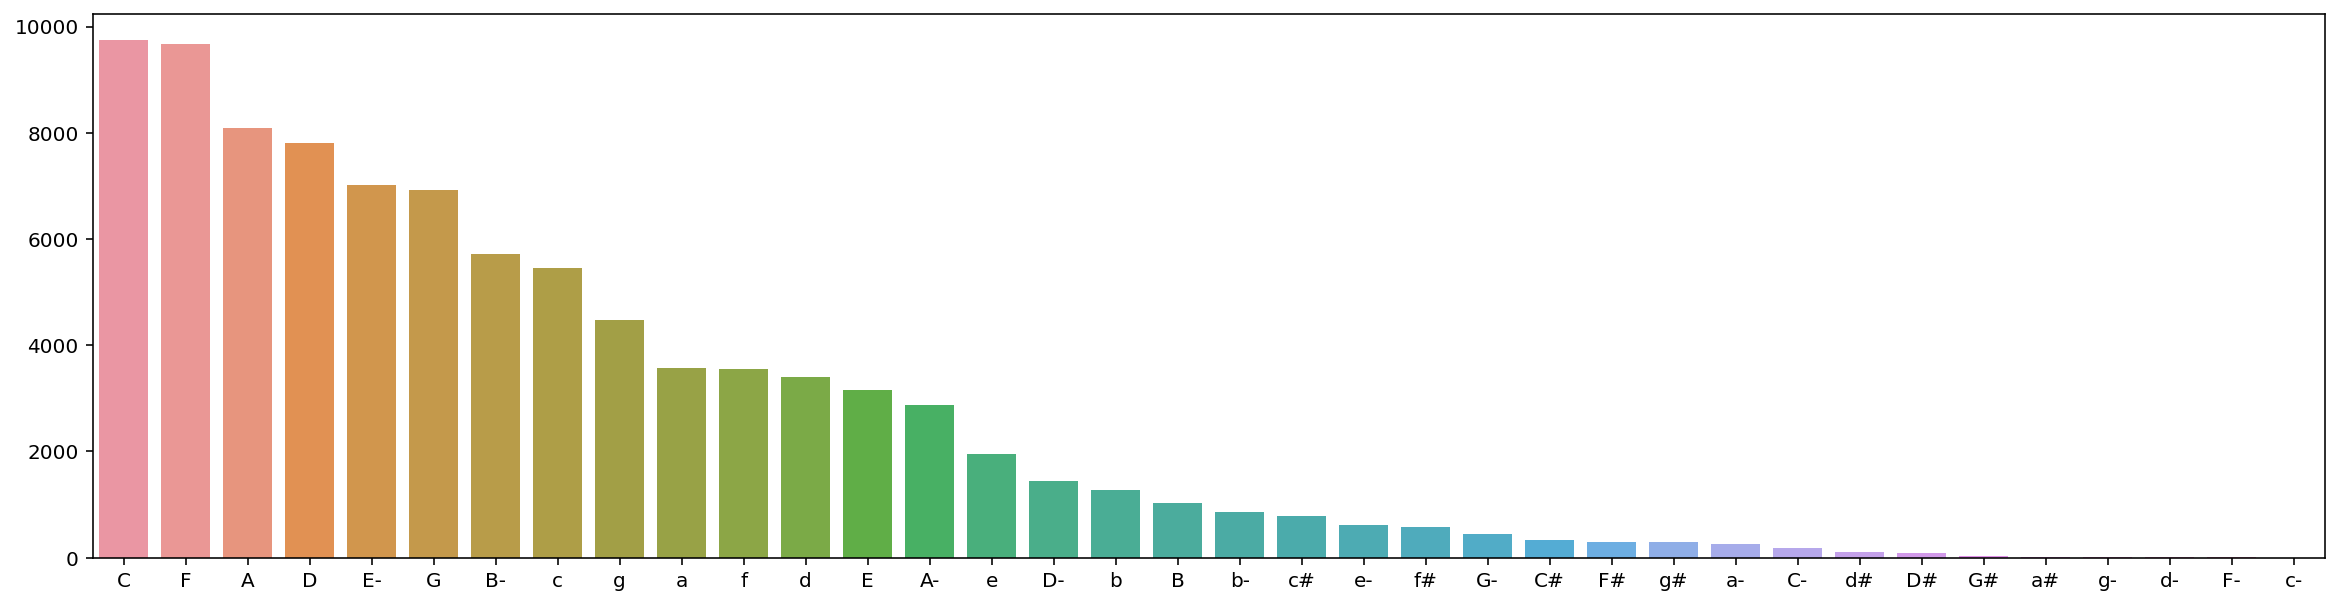

In [14]:
d = dfAll.localKey.value_counts().to_dict()
x, y = list(d.keys()), list(d.values())
plt.figure(figsize=(20, 5))
sns.barplot(x=x, y=y)

In [15]:
d

{'C': 9749,
 'F': 9669,
 'A': 8092,
 'D': 7810,
 'E-': 7008,
 'G': 6920,
 'B-': 5711,
 'c': 5460,
 'g': 4479,
 'a': 3569,
 'f': 3560,
 'd': 3394,
 'E': 3152,
 'A-': 2881,
 'e': 1958,
 'D-': 1443,
 'b': 1269,
 'B': 1023,
 'b-': 868,
 'c#': 792,
 'e-': 613,
 'f#': 580,
 'G-': 441,
 'C#': 326,
 'F#': 301,
 'g#': 285,
 'a-': 254,
 'C-': 176,
 'd#': 111,
 'D#': 82,
 'G#': 21,
 'a#': 18,
 'g-': 16,
 'd-': 14,
 'F-': 4,
 'c-': 1}

## Tonicized Keys

<AxesSubplot:>

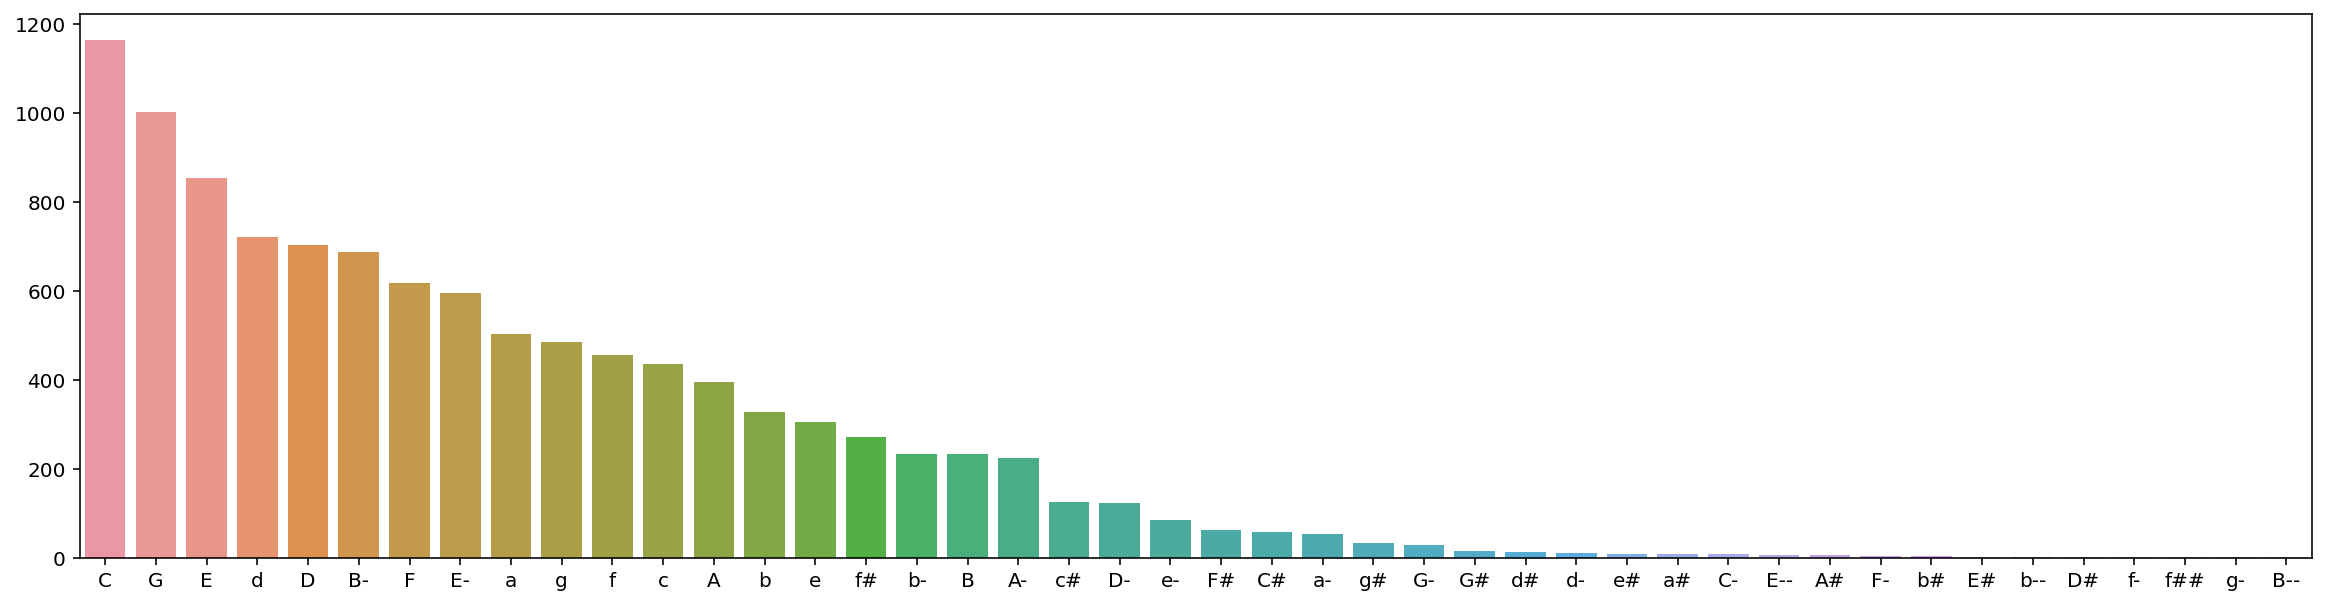

In [16]:
d = dfAll.tonicizedKey.value_counts().to_dict()
del d['None']
x, y = list(d.keys()), list(d.values())
plt.figure(figsize=(20, 5))
sns.barplot(x=x, y=y)

## Quality

<AxesSubplot:>

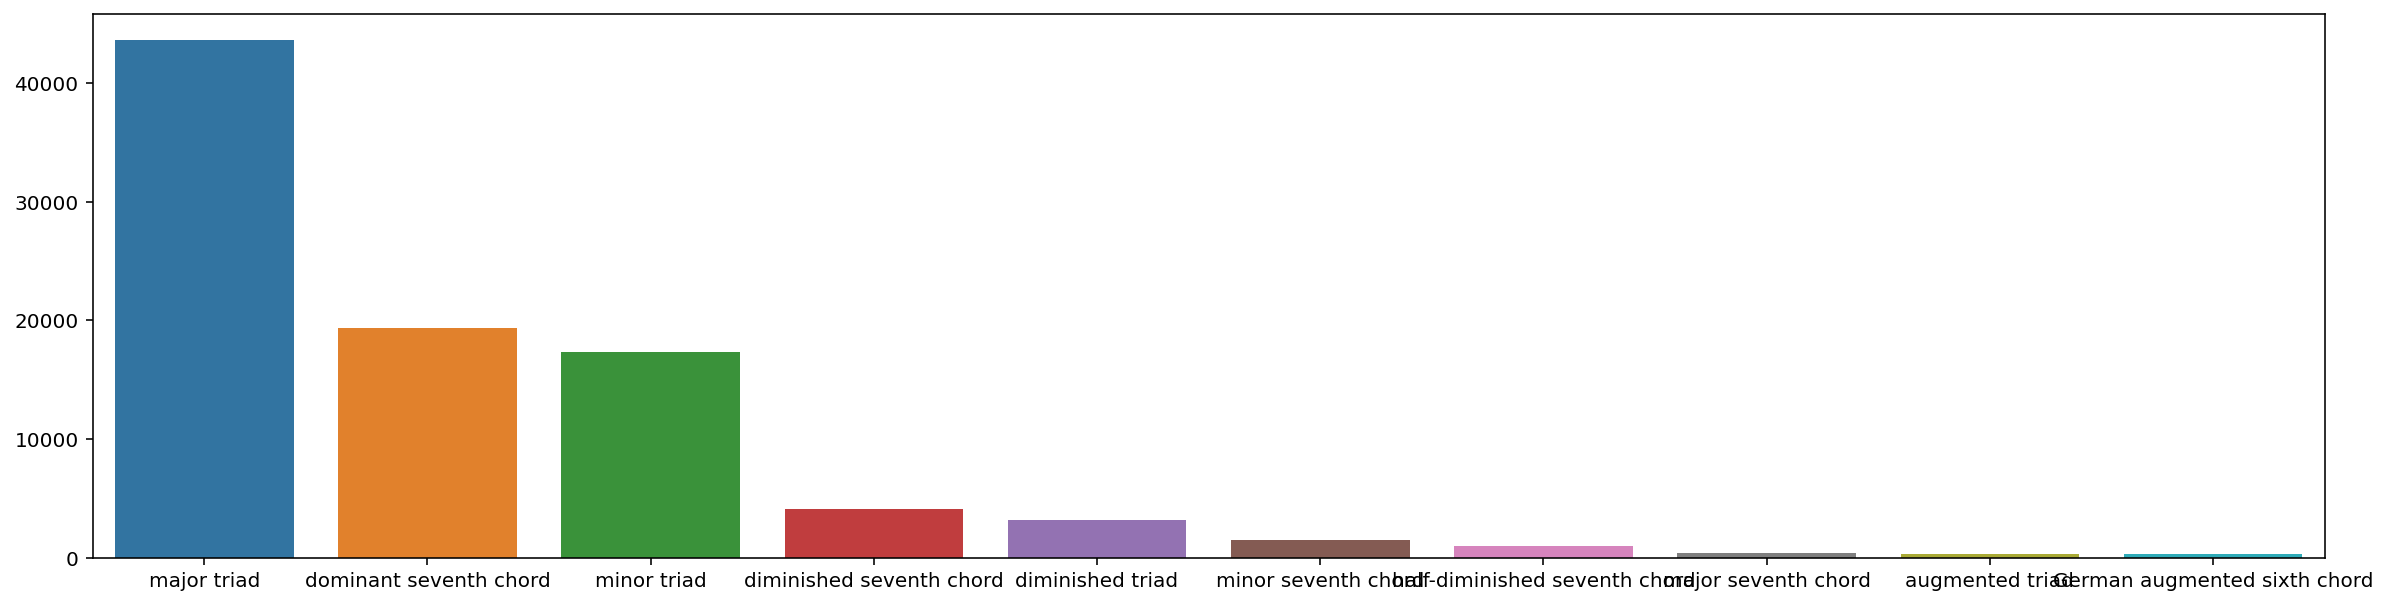

In [17]:
d = dfAll.quality.value_counts().to_dict()
x, y = list(d.keys()), list(d.values())
plt.figure(figsize=(20, 5))
sns.barplot(x=x[:10], y=y[:10])

In [18]:
d

{'major triad': 43628,
 'dominant seventh chord': 19350,
 'minor triad': 17344,
 'diminished seventh chord': 4080,
 'diminished triad': 3179,
 'minor seventh chord': 1500,
 'half-diminished seventh chord': 979,
 'major seventh chord': 353,
 'augmented triad': 288,
 'German augmented sixth chord': 273,
 'flat-ninth pentachord': 148,
 'dominant-ninth': 118,
 'Italian augmented sixth chord': 112,
 'incomplete dominant-seventh chord': 111,
 'Perfect Fifth': 103,
 'Minor Third': 58,
 'enharmonic to dominant seventh chord': 58,
 'quartal trichord': 43,
 'French augmented sixth chord': 41,
 'Major Third': 36,
 'note': 31,
 'augmented seventh chord': 23,
 'augmented major tetrachord': 23,
 'minor-augmented tetrachord': 20,
 'Perfect Fourth': 14,
 'enharmonic equivalent to diminished triad': 14,
 'incomplete half-diminished seventh chord': 13,
 'Major Sixth': 12,
 "Messiaen's truncated mode 6": 10,
 'whole-tone tetramirror': 9,
 'incomplete minor-seventh chord': 8,
 'whole-tone trichord': 6,
 '

## PCSETS

<AxesSubplot:>

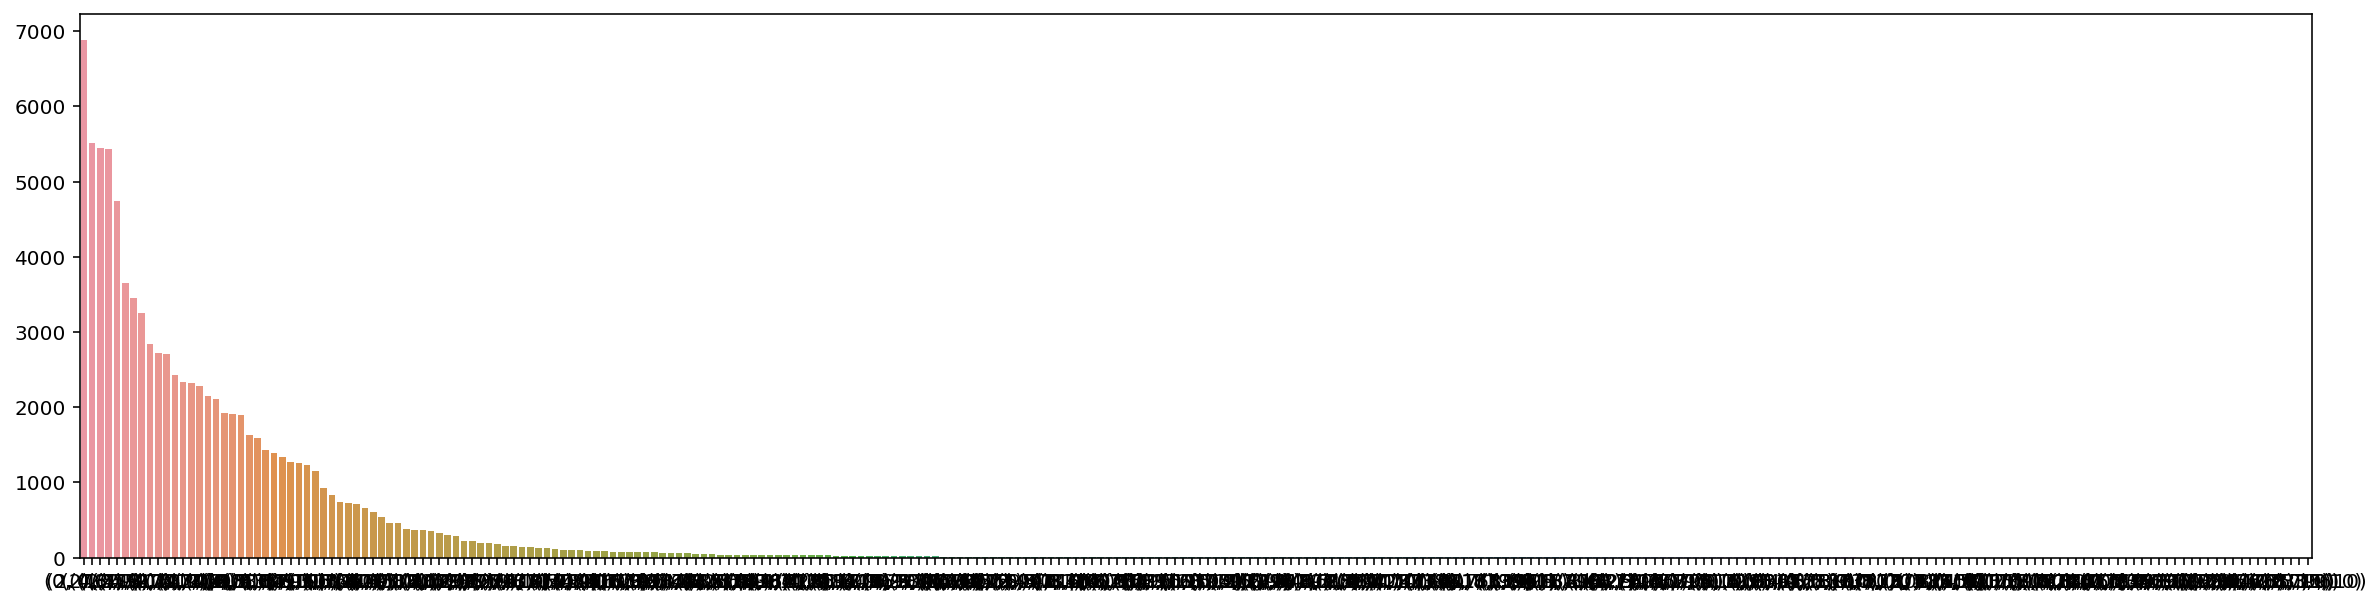

In [19]:
d = dfAll.pcset.value_counts().to_dict()
x, y = list(d.keys()), list(d.values())
x = [str(_) for _ in x]
plt.figure(figsize=(20, 5))
sns.barplot(x=x, y=y)

In [15]:
d

{(0, 4, 7): 6885,
 (2, 7, 11): 5509,
 (2, 6, 9): 5448,
 (0, 5, 9): 5428,
 (1, 4, 9): 4744,
 (2, 5, 10): 3653,
 (3, 7, 10): 3457,
 (4, 8, 11): 3257,
 (2, 5, 7, 11): 2843,
 (0, 4, 7, 10): 2717,
 (2, 5, 9): 2708,
 (0, 3, 7): 2429,
 (1, 4, 7, 9): 2330,
 (2, 7, 10): 2320,
 (0, 4, 9): 2282,
 (0, 2, 6, 9): 2148,
 (2, 4, 8, 11): 2104,
 (0, 3, 8): 1917,
 (2, 5, 8, 10): 1909,
 (0, 5, 8): 1890,
 (4, 7, 11): 1629,
 (0, 3, 5, 9): 1596,
 (2, 5, 8, 11): 1430,
 (0, 3, 6, 9): 1387,
 (3, 6, 9, 11): 1334,
 (3, 6, 11): 1278,
 (1, 4, 7, 10): 1263,
 (1, 5, 8): 1226,
 (2, 6, 11): 1146,
 (1, 3, 7, 10): 928,
 (1, 6, 10): 827,
 (0, 3, 6, 8): 739,
 (1, 5, 10): 722,
 (1, 6, 9): 714,
 (1, 4, 6, 10): 659,
 (1, 4, 8): 600,
 (3, 6, 10): 542,
 (4, 7, 10): 465,
 (2, 5, 11): 464,
 (1, 5, 8, 11): 374,
 (1, 4, 7): 364,
 (3, 8, 11): 362,
 (0, 6, 9): 350,
 (2, 5, 8): 330,
 (2, 8, 11): 301,
 (0, 3, 9): 282,
 (0, 2, 5, 9): 224,
 (3, 6, 9): 216,
 (0, 2, 5, 8): 189,
 (2, 4, 7, 11): 188,
 (0, 3, 5, 8): 183,
 (1, 7, 10): 158,
 (2

## Scale Degrees 1

<AxesSubplot:>

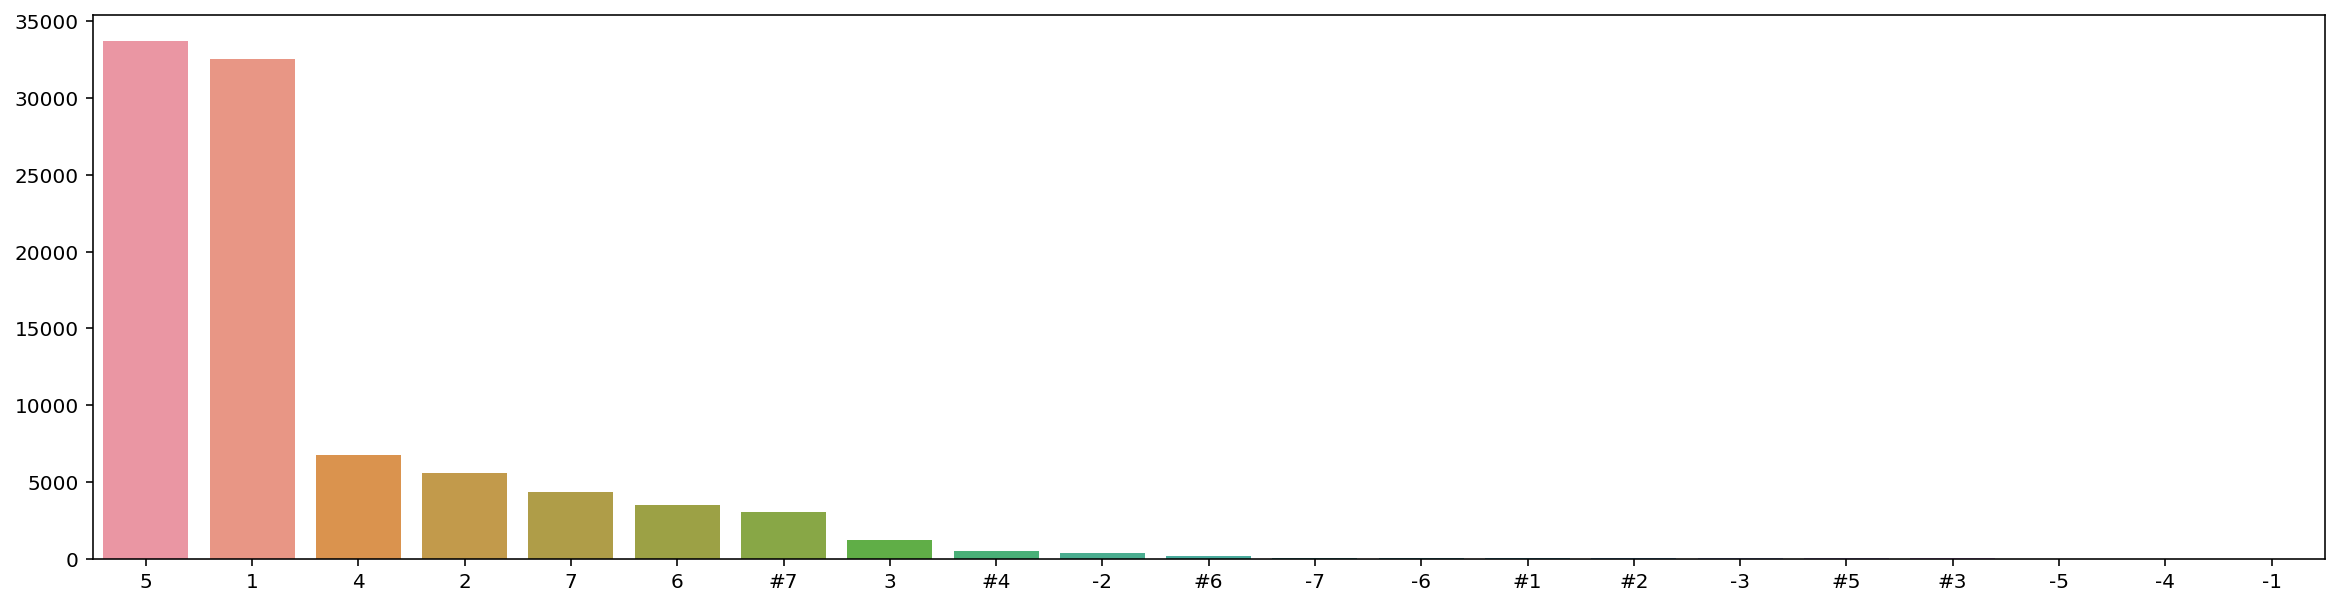

In [11]:
d = dfAll.degree1.value_counts().to_dict()
x, y = list(d.keys()), list(d.values())
plt.figure(figsize=(20, 5))
sns.barplot(x=x[:50], y=y[:50])

In [12]:
d

{'5': 33727,
 '1': 32533,
 '4': 6781,
 '2': 5591,
 '7': 4355,
 '6': 3491,
 '#7': 3057,
 '3': 1234,
 '#4': 521,
 '-2': 348,
 '#6': 142,
 '-7': 71,
 '-6': 58,
 '#1': 34,
 '#2': 33,
 '-3': 33,
 '#5': 19,
 '#3': 9,
 '-5': 6,
 '-4': 4,
 '-1': 3}

## Scale Degree 2

<AxesSubplot:>

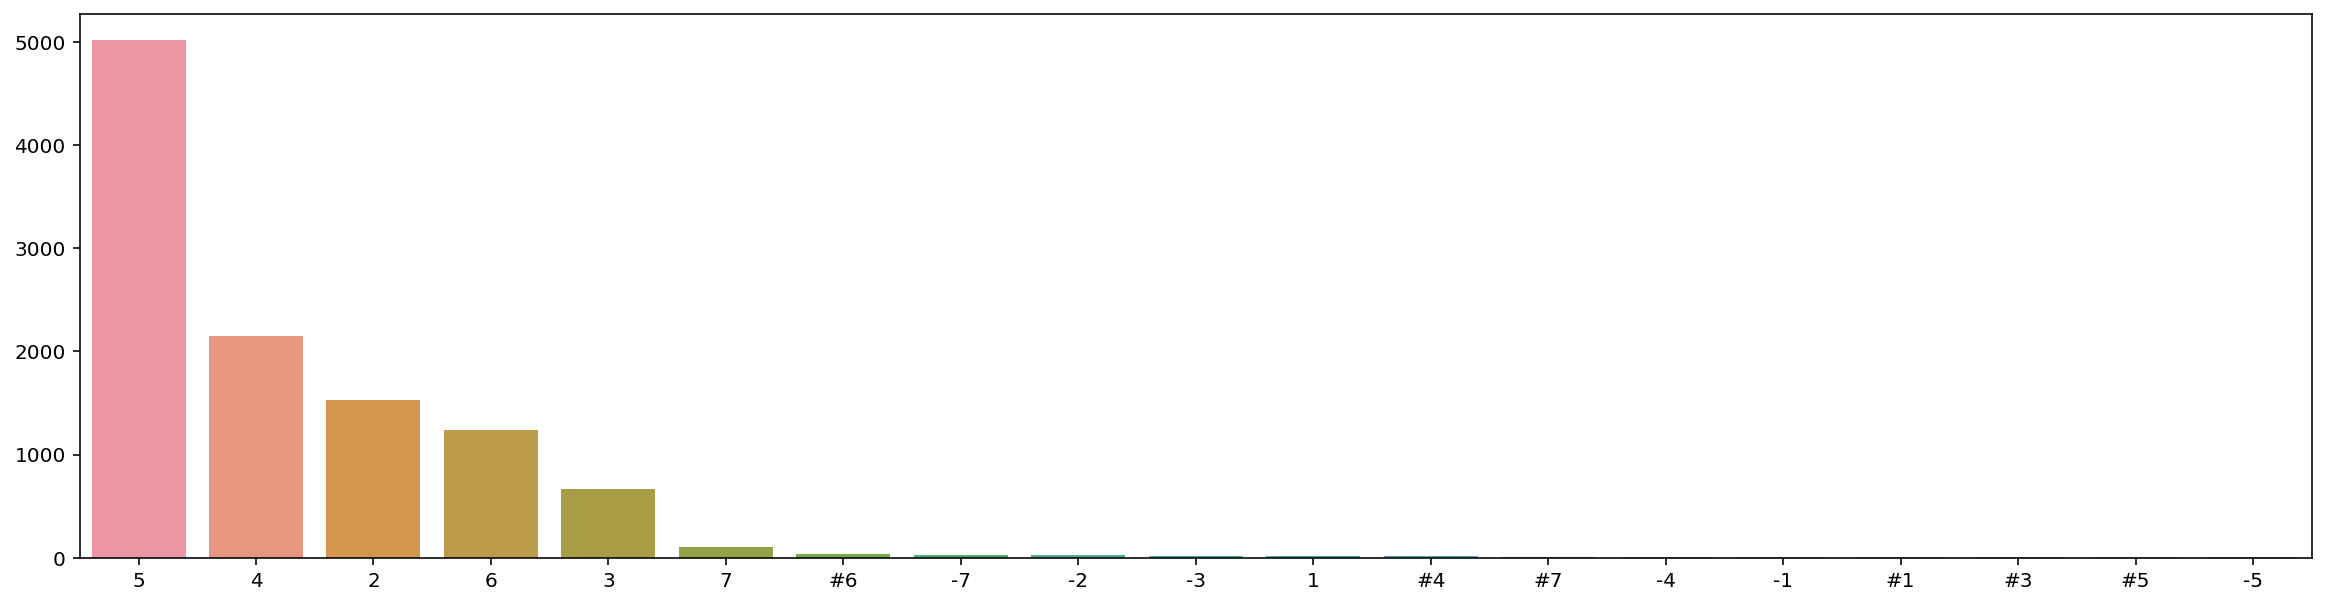

In [182]:
d = dfAll.degree2.value_counts().to_dict()
del d['None']
x, y = list(d.keys()), list(d.values())
plt.figure(figsize=(20, 5))
sns.barplot(x=x[:50], y=y[:50])

In [183]:
d

{'5': 5023,
 '4': 2147,
 '2': 1526,
 '6': 1238,
 '3': 669,
 '7': 106,
 '#6': 33,
 '-7': 24,
 '-2': 22,
 '-3': 20,
 '1': 19,
 '#4': 18,
 '#7': 5,
 '-4': 4,
 '-1': 3,
 '#1': 3,
 '#3': 2,
 '#5': 1,
 '-5': 1}

## Inversion

<AxesSubplot:>

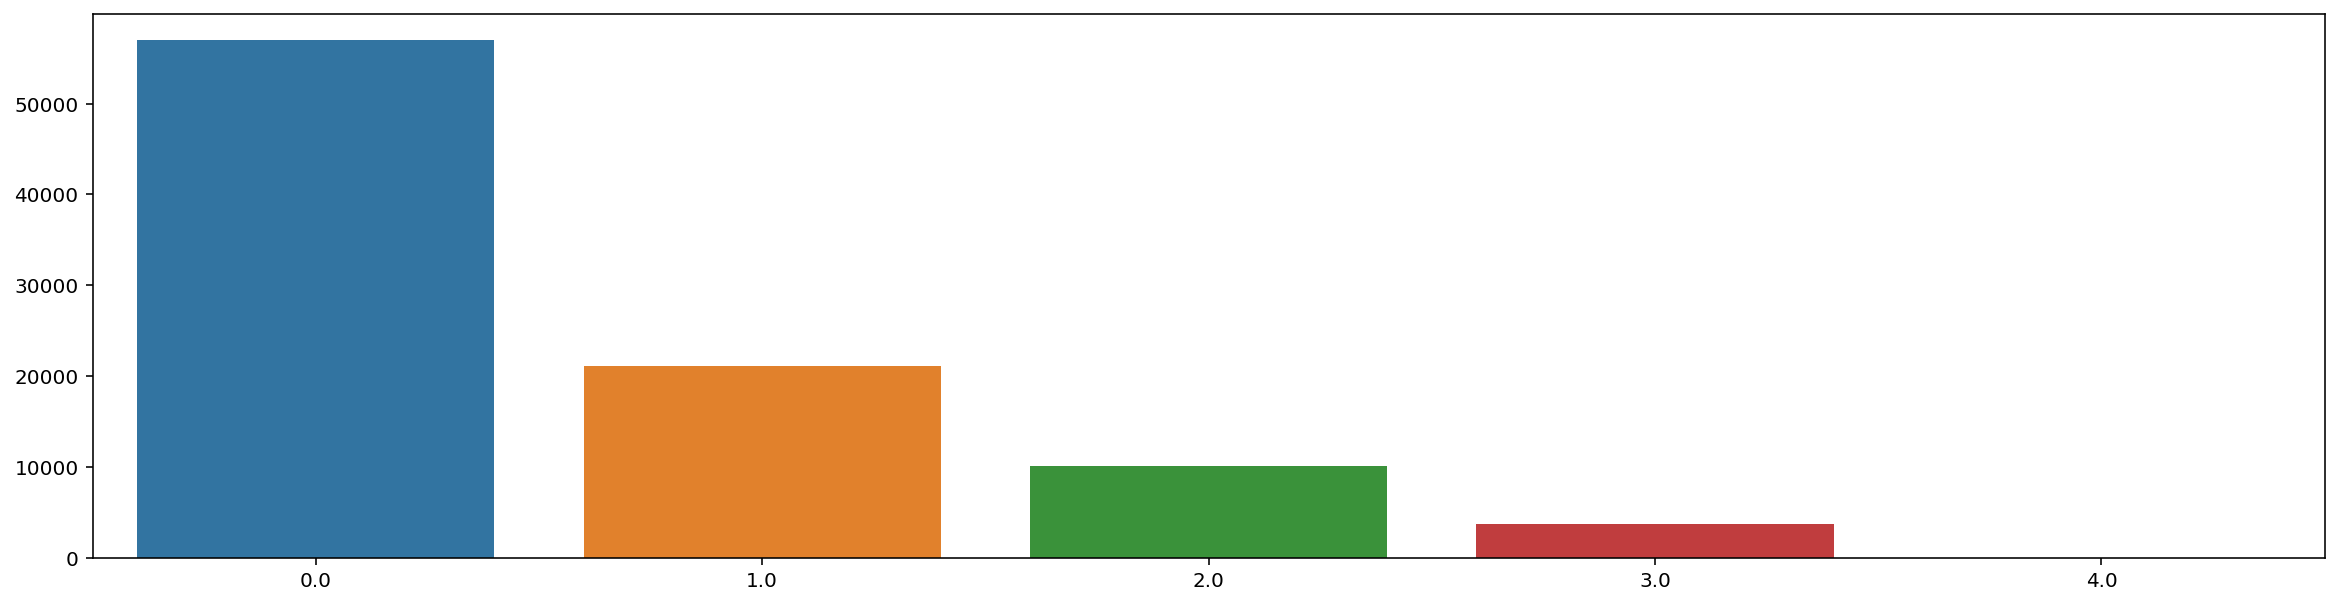

In [184]:
d = dfAll.inversion.value_counts().to_dict()
x, y = list(d.keys()), list(d.values())
plt.figure(figsize=(20, 5))
sns.barplot(x=x[:50], y=y[:50])

In [185]:
d

{0.0: 57019, 1.0: 21148, 2.0: 10140, 3.0: 3737, 4.0: 6}

## Root

<AxesSubplot:>

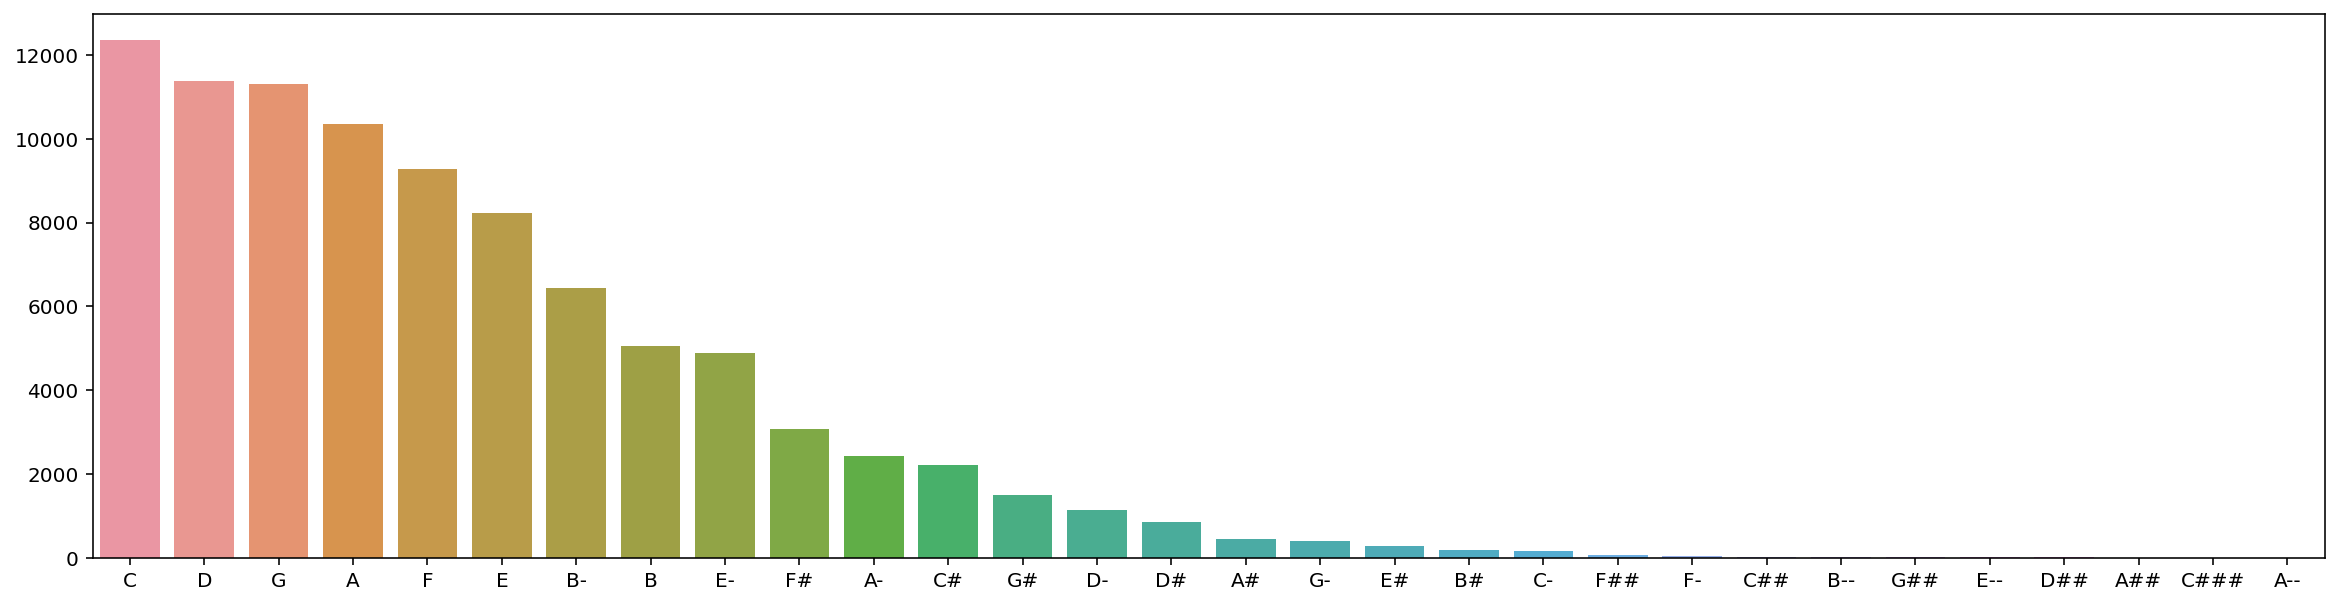

In [186]:
d = dfAll.root.value_counts().to_dict()
x, y = list(d.keys()), list(d.values())
plt.figure(figsize=(20, 5))
sns.barplot(x=x[:50], y=y[:50])

In [187]:
d

{'C': 12360,
 'D': 11377,
 'G': 11297,
 'A': 10356,
 'F': 9270,
 'E': 8216,
 'B-': 6439,
 'B': 5063,
 'E-': 4874,
 'F#': 3079,
 'A-': 2414,
 'C#': 2212,
 'G#': 1502,
 'D-': 1143,
 'D#': 845,
 'A#': 441,
 'G-': 389,
 'E#': 268,
 'B#': 177,
 'C-': 158,
 'F##': 62,
 'F-': 43,
 'C##': 26,
 'B--': 17,
 'G##': 12,
 'E--': 3,
 'D##': 3,
 'A##': 2,
 'C###': 1,
 'A--': 1}

## Bass

<AxesSubplot:>

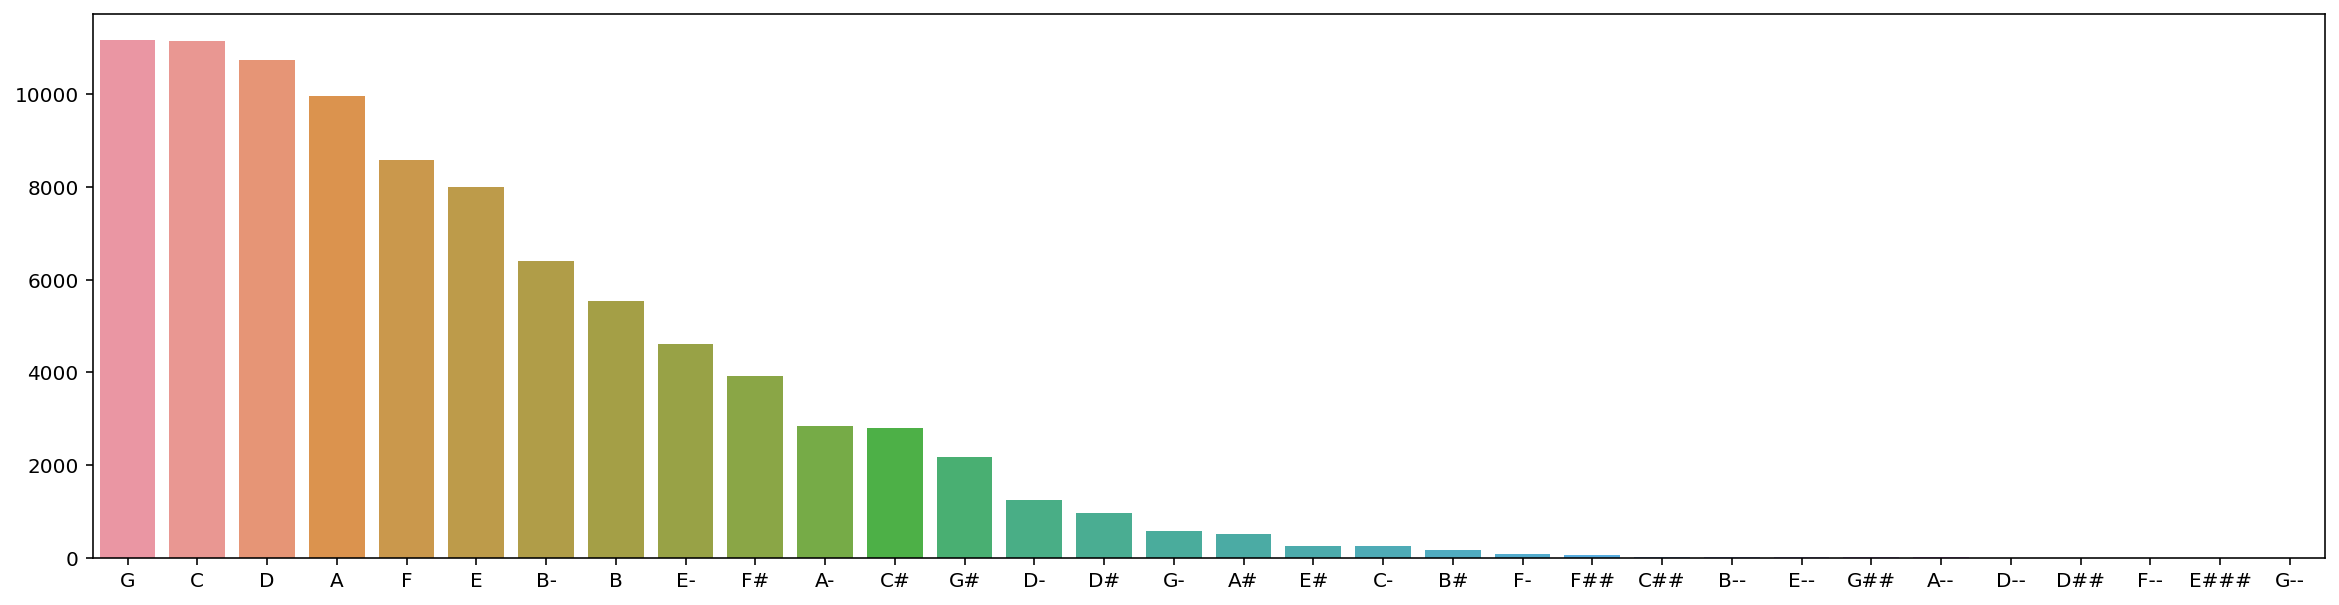

In [188]:
d = dfAll.bass.value_counts().to_dict()
x, y = list(d.keys()), list(d.values())
plt.figure(figsize=(20, 5))
sns.barplot(x=x[:50], y=y[:50])

In [189]:
d

{'G': 11176,
 'C': 11160,
 'D': 10742,
 'A': 9959,
 'F': 8573,
 'E': 7990,
 'B-': 6409,
 'B': 5536,
 'E-': 4615,
 'F#': 3914,
 'A-': 2843,
 'C#': 2798,
 'G#': 2171,
 'D-': 1250,
 'D#': 969,
 'G-': 578,
 'A#': 505,
 'E#': 258,
 'C-': 242,
 'B#': 173,
 'F-': 75,
 'F##': 52,
 'C##': 22,
 'B--': 15,
 'E--': 12,
 'G##': 3,
 'A--': 3,
 'D--': 2,
 'D##': 2,
 'F--': 1,
 'E###': 1,
 'G--': 1}

## Harmonic Rhythm (duration)

<AxesSubplot:>

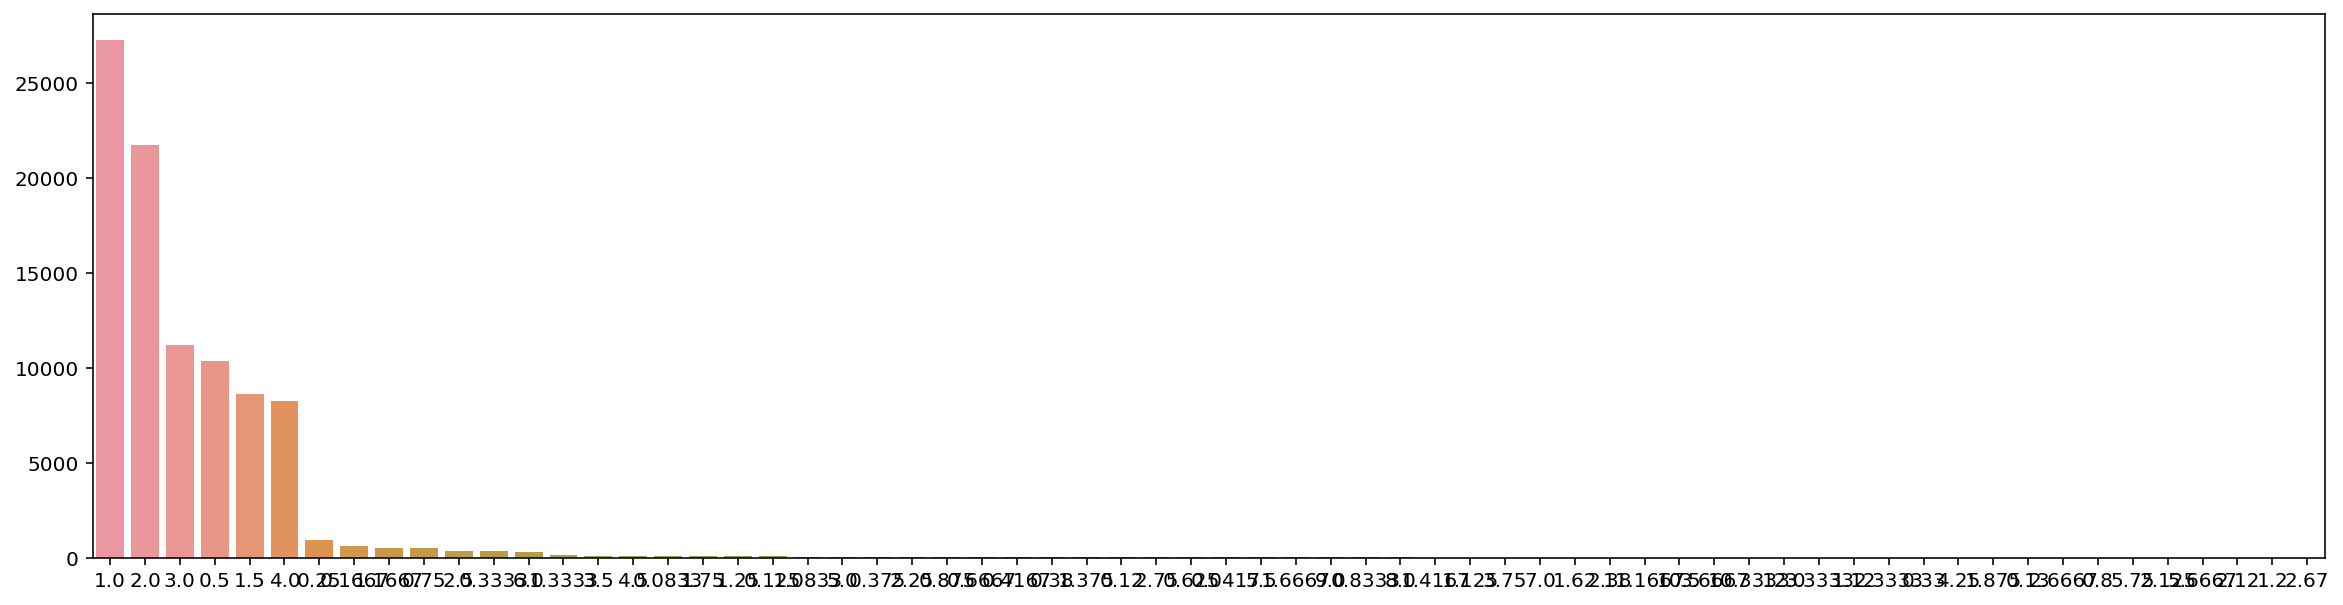

In [21]:
d = dfAll.duration.value_counts().to_dict()
x, y = list(d.keys()), list(d.values())
x = [str(_) for _ in x]
plt.figure(figsize=(20, 5))
sns.barplot(x=x, y=y)

In [17]:
d

{1.0: 27299,
 2.0: 21761,
 3.0: 11195,
 0.5: 10391,
 1.5: 8642,
 4.0: 8239,
 0.25: 930,
 0.1667: 590,
 1.1667: 521,
 0.75: 495,
 2.5: 359,
 0.3333: 325,
 6.0: 296,
 1.3333: 149,
 3.5: 106,
 4.5: 105,
 0.0833: 104,
 1.75: 74,
 1.25: 71,
 0.125: 63,
 1.0833: 50,
 5.0: 35,
 0.375: 26,
 2.25: 24,
 0.875: 20,
 0.6667: 19,
 0.4167: 19,
 0.38: 12,
 1.375: 12,
 0.12: 11,
 2.75: 10,
 0.625: 10,
 0.0417: 8,
 5.5: 7,
 1.6667: 7,
 9.0: 7,
 0.8333: 7,
 8.0: 6,
 1.4167: 4,
 1.125: 4,
 3.75: 3,
 7.0: 3,
 1.62: 3,
 2.38: 3,
 11.1667: 2,
 10.5: 2,
 3.6667: 2,
 10.3333: 2,
 12.0: 2,
 3.3333: 1,
 1.12: 1,
 2.3333: 1,
 0.33: 1,
 4.25: 1,
 1.875: 1,
 0.13: 1,
 2.6667: 1,
 0.8: 1,
 5.75: 1,
 2.125: 1,
 5.6667: 1,
 2.12: 1,
 1.2: 1,
 2.67: 1}

# Exploring notes and intervals

In [1]:
from common import ANNOTATIONSCOREMAP
from score_parser import _initialDataFrame

In [2]:
import pandas as pd
import music21
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
pd.set_option('display.max_rows', 6000)

In [5]:
dfAll = pd.DataFrame({
    'offset': [],
    'genre': [],
    'composer': [],
    'work': [],
    'movement': [],
    'measure': [],
    'duration': [],
    'notes': [],
    'intervals': [],
})
for annotation, score in ANNOTATIONSCOREMAP.items():
    print(score)
    _, _, genre, composer, work, movement, _ = annotation.split('/')
    s = music21.converter.parse(score, format="romantext")
    df = _initialDataFrame(s)
    df['genre'] = genre
    df['composer'] = composer
    df['work'] = work
    df['movement'] = movement
    df['offset'] = df.index
    dfAll = dfAll.append(df, ignore_index=True)

beethoven-piano-sonatas/kern/sonata01-1.krn
beethoven-piano-sonatas/kern/sonata02-1.krn
beethoven-piano-sonatas/kern/sonata03-1.krn
beethoven-piano-sonatas/kern/sonata04-1.krn
beethoven-piano-sonatas/kern/sonata05-1.krn
beethoven-piano-sonatas/kern/sonata06-1.krn
beethoven-piano-sonatas/kern/sonata07-1.krn
beethoven-piano-sonatas/kern/sonata08-1.krn
beethoven-piano-sonatas/kern/sonata09-1.krn
beethoven-piano-sonatas/kern/sonata10-1.krn
beethoven-piano-sonatas/kern/sonata11-1.krn
beethoven-piano-sonatas/kern/sonata12-1.krn
beethoven-piano-sonatas/kern/sonata13-1.krn
beethoven-piano-sonatas/kern/sonata14-1.krn
beethoven-piano-sonatas/kern/sonata15-1.krn
beethoven-piano-sonatas/kern/sonata16-1.krn
beethoven-piano-sonatas/kern/sonata17-1.krn
beethoven-piano-sonatas/kern/sonata18-1.krn
beethoven-piano-sonatas/kern/sonata19-1.krn
beethoven-piano-sonatas/kern/sonata20-1.krn
beethoven-piano-sonatas/kern/sonata21-1.krn
beethoven-piano-sonatas/kern/sonata22-1.krn
beethoven-piano-sonatas/kern/son

RomanTextException: ('Cannot find the first measure definition in this file. Dumping contexts: %s', ['**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=1-\t=1-', '8AAL\t4e 4cc#', '8AJ\t.', '8AAL\t4e 4cc#', '8AJ\t.', '=2\t=2', '8AAL\t(8eL 8cc#', '8AJ\t8dJ 8b', '8AAL\t4c#) 4a', '8AJ\t.', '=3\t=3', '8AAL\t4cc# 4ee', '8AJ\t.', '8AAL\t4cc# 4ee', '8AJ\t.', '=4\t=4', '8AAL\t(8cc#L 8ee', '8AJ\t8bJ 8dd', '8AAL\t4a) 4cc#', '8AJ\t.', '=5\t=5', '8DL\t(8g#L 8cc#', '8EJ\t8bJ', '8C#L\t4a)', '8EJ\t.', '=6\t=6', '8DL\t(8g#L 8cc#', '8EJ\t8bJ', '8C#L\t4a)', '8EJ\t.', '=7\t=7', '*\t*^', '8BBL\t4ee\t4g#', '8BJ\t.\t.', '8BBL\t(16dd#LL\t4a', '.\t16ee\t.', '8BJ\t16ff#\t.', '.\t16dd#JJ)\t.', '=8\t=8\t=8', '8EL\t4ee\t4g#', '8eJ\t.\t.', '8E\t4r\t4r', '8r\t.\t.', '*\t*v\t*v', '*END\t*END', '=9\t=9', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=\t=', '8AL 8c#\t4e 4ee', '8EJ\t.', '8AL 8c#\t4e 4ee', '8EJ\t.', '=10\t=10', '8BL 8d\t8eL 8dd', '8EJ\t8bJ', '8BL 8d\t4g#', '8EJ\t.', '=11\t=11', '8AL 8c#\t8eL 8ee', '8EJ\t8eJ 8ee', '8AL 8c#\t8eL 8ee', '8EJ\t8eJ 8ee', '=12\t=12', '8BL 8d\t8eL 8dd', '8EJ\t8bJ', '8BL 8d\t4g#', '8EJ\t.', '=13\t=13', '4A 4c#\t16aLL', '.\t16cc#', '.\t16b', '.\t16ddJJ', '4r\t16cc#LL', '.\t16ee', '.\t16dd', '.\t16ff#JJ', '=14\t=14', '2r\t(4ee', '.\t8aa)', '.\t8r', '=15\t=15', '4E 4e\t4cc#', '.\tcc#q', '4E 4d\t(16bLL', '.\t16a', '.\t16b', '.\t16cc#JJ)', '=16\t=16', '4A 4c#\t4a', '[8AA\t8r', '==\t==', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8AA]\t8e', '=17\t=17', '8AL 8c#\t4e 4ee', '8EJ\t.', '8AL 8c#\t4e 4ee', '8EJ\t.', '=18\t=18', '8BL 8d\t8eL 8dd', '8EJ\t8bJ', '8BL 8d\t4g#', '8EJ\t.', '=19\t=19', '.\tdd#q', '8AL 8c#\t8eeL', '.\tdd#q', '8EJ\t8eeJ', '.\tdd#q', '8AL 8c#\t8eeL', '.\tdd#q', '8EJ\t8eeJ', '=20\t=20', '8BL 8d\t8eL 8dd', '8EJ\t8bJ', '8BL 8d\t8g#', '8EJ\t8r', '=21\t=21', '4A 4c#\t16aLL', '.\t16cc#', '.\t16b', '.\t16ddJJ', '4r\t16cc#LL', '.\t16ee', '.\t16dd', '.\t16ff#JJ', '=22\t=22', '2r\t4ee', '.\tgg#q', '.\t8aa', '.\t8r', '=23\t=23', '4E 4e\t4cc#', '.\tcc#q', '4E 4d\t(16bLL', '.\t16a', '.\t16b', '.\t16cc#JJ)', '=24\t=24', '4A 4c#\t4a', '8AA\t8r', '==\t==', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t8e', '=\t=', '.\tddq', "4r\t12cc#'L", ".\t12b#'", ".\t12cc#'J", "4A 4e\t12ee'L", ".\t12cc#'", ".\t12a'J", '=26\t=26', '4A 4d\t(12bL', '.\t12ee)', ".\t12g#'J", "8A 8c#\t12a'L", ".\t12cc#'", '8r\t.', ".\t12dd'J", '=27\t=27', '.\tff#q', "4r\t12ee'L", ".\t12dd#'", ".\t12ee'J", "4c# 4e\t12aa'L", ".\t12ee'", ".\t12cc#'J", '=28\t=28', '4G# 4e\t(12ddL', '.\t12ee)', ".\t12b'J", "8A 8e\t12cc#'L", ".\t12ee'", '8r\t.', ".\t12cc#'J", '=29\t=29', "4d 4e\t12b'L", '.\t(12dd#', '.\t12eeJ)', "8c# 8e\t12a'L", '.\t(12dd#', '8r\t.', '.\t12eeJ)', '=30\t=30', "4d 4e\t12b'L", '.\t(12dd#', '.\t12eeJ)', "8c# 8e\t12a'L", '.\t(12dd#', '8r\t.', '.\t12eeJ)', '=31\t=31', "4B 4e\t12g#'L", '.\t(12a#', '.\t12bJ)', "4B 4d#\t12f#'L", '.\t(12a#', '.\t12bJ)', '=32\t=32', '12EL\t4e', '12G#\t.', '12BJ\t.', '8e\t8r', '==\t==', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t8ee', '=33\t=33', '.\tff#q', "4r\t12ee'L", ".\t12dd#'", ".\t12ee'J", '4C#^ 4E^ 4A^\t12r', '.\t(12ff#L', '.\t12eeJ)', '=34\t=34', "4BB 4E 4G#\t12ee'L", ".\t12dd'", ".\t12cc#'J", "4D 4E 4B\t12b'L", ".\t12a'", ".\t12g#'J", '=35\t=35', "4r\t12a'L", '.\t(12dd#', '.\t12eeJ)', '4C#^ 4E^ 4A^\t12r', '.\t(12ff#L', '.\t12eeJ)', '=36\t=36', "4BB 4E 4G#\t12ee'L", ".\t12dd'", ".\t12cc#'J", "4D 4E 4B\t12b'L", ".\t12a'", ".\t12g#'J", '=37\t=37', "4C# 4E 4A\t12a'L", ".\t12b'", ".\t12cc#'J", "4r\t12dd'L", ".\t12ee'", ".\t12ff#'J", '=38\t=38', "4r\t12gg#'L", ".\t12aa'", ".\t12bb'J", "4F# 4A\t12ccc#'L", ".\t12ddd'", ".\t12ddd#'J", '=39\t=39', '4E 4A 4c#\t(12eeeL', '.\t12ccc#)', ".\t12aa'J", '4E 4B 4d\t(12dddL', '.\t12bb)', ".\t12gg#'J", '=40\t=40', "4A 4c#\t12aa'L", '.\t(12ccc#', '.\t12bbJ)', "4r\t12aa'L", ".\t12gg#'", ".\t12ff#'J", '=41\t=41', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=\t=', '.\tff#q', "12C#L\t12ee'L", "12E\t12dd#'", "12AJ\t12ee'J", '12C#L\t12r', '12E\t(12ff#L', '12AJ\t12eeJ)', '=42\t=42', "12BBL\t12ee'L", "12E\t12dd'", "12G#J\t12cc#'J", "12DL\t12b'L", "12E\t12a'", "12BJ\t12g#'J", '=43\t=43', "12C#L\t12a'L", '12E\t(12dd#', '12AJ\t12eeJ)', '12C#L\t12r', '12E\t(12ff#L', '12AJ\t12eeJ)', '=44\t=44', "12BBL\t12ee'L", "12E\t12dd'", "12G#J\t12cc#'J", "12DL\t12b'L", "12E\t12a'", "12BJ\t12g#'J", '=45\t=45', "4C# 4E 4A\t12a'L", ".\t12b'", ".\t12cc#'J", "4r\t12dd'L", ".\t12ee'", ".\t12ff#'J", '=46\t=46', "4r\t12gg#'L", ".\t12aa'", ".\t12bb'J", "4F# 4A\t12ccc#'L", ".\t12ddd'", ".\t12ddd#'J", '=47\t=47', '4E 4A 4c#\t(12eeeL', '.\t12ccc#)', ".\t12aa'J", '4E 4B 4d\t(12dddL', '.\t12bb)', ".\t12gg#'J", '=48\t=48', '12AL\t4aa', '12E\t.', '12C#J\t.', '8AA\t8r', '==\t==', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '*clefF4\t*clefG2', '=-\t=-', '8r\t8e', '=49||\t=49||', '8AAL 8A\t16cc#LL', '.\t16e', '8AAJ 8A\t16cc#', '.\t16eJJ', '8AAL 8A\t16cc#LL', '.\t16e', '8AAJ 8A\t16dd', '.\t16cc#JJ', '=50\t=50', '(4GG# 4G#\t16bLL', '.\t16d', '.\t16cc#', '.\t16bJJ', '8AA) 8A\t16aLL', '.\t16e', '8r\t16a', '.\t16cc#JJ', '=51\t=51', '8c#L 8e\t16eeLL', '.\t16a', '8c#J 8e\t16ee', '.\t16aJJ', '8c#L 8e\t16eeLL', '.\t16a', '8c#J 8e\t16ff#', '.\t16eeJJ', '=52\t=52', '(4B 4e\t16ddLL', '.\t16g#', '.\t16ee', '.\t16ddJJ', '8A) 8e\t16cc#LL', '.\t16a', '8r\t16dd', '.\t16cc#JJ', '=53\t=53', '8dL\t16bLL', '.\t16a#', '8EJ\t16cc#', '.\t16bJJ', '8c#L\t16a#LL', '.\t16cc#', '8AJ\t16ee', '.\t16cc#JJ', '=54\t=54', '8dL\t16bLL', '.\t16a#', '8EJ\t16cc#', '.\t16bJJ', '8c#L\t16a#LL', '.\t16cc#', '8AJ\t16ee', '.\t16aaJJ', '=55\t=55', '8BL\t16gg#LL', '.\t16bb', '8eJ\t16aa', '.\t16gg#JJ', '8BL\t16ff#LL', '.\t16aa', '8d#J\t16gg#', '.\t16ff#JJ', '=56\t=56', '8eL\t4ee', '8BJ\t.', '8E\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t8ee', '=57\t=57', '8c#L 8e 8a\t16ddd#LL', '.\t16eee', '8c#J 8e 8a\t16ddd#', '.\t16eeeJJ', '8c#L 8e 8a\t16ddd#LL', '.\t16eee', '8c#J 8e 8a\t16ddd#', '.\t16eeeJJ', '=58\t=58', '4B 4e 4g#\t16dddLL', '.\t16ccc#', '.\t16bb', '.\t16aaJJ', '4r\t16gg#LL', '.\t16ff#', '.\t16ee', '.\t16ddJJ', '=59\t=59', '8AL 8e\t16cc#LL', '.\t16ee', '8AJ 8e\t16dd#', '.\t16eeJJ', '8AL 8e\t16dd#LL', '.\t16ee', '8AJ 8e\t16dd#', '.\t16eeJJ', '=60\t=60', '4G# 4e\t16ddLL', '.\t16cc#', '.\t16b', '.\t16aJJ', '4r\t16g#LL', '.\t16f#', '.\t16e', '.\t16dJJ', '=61\t=61', '8AA\t16c#LL', '.\t16d', '4A\t16e', '.\t16f#JJ', '.\t16g#LL', '.\t16a', '[8G#\t16b', '.\t16cc#JJ', '=62\t=62', '8G#L]\t16ddLL', '.\t16ee', "8F#'J\t16ff#", '.\t16gg#JJ', "8E'L\t16aaLL", '.\t16bb', "8D'J\t16ccc#", '.\t16dddJJ', '=63\t=63', "8C#'L\t8eeeL", "8D'J\t8eeeJ", "8E'L\t8r", "8EE'J\t8dd 8gg#", '=64\t=64', '8AAL\t4cc# 4aa', '8EJ\t.', '8A\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t8ee', '=65\t=65', '8C#L 8E 8A\t16ddd#LL', '.\t16eee', '8C#J 8E 8A\t16ddd#', '.\t16eeeJJ', '8C#L 8E 8A\t16ddd#LL', '.\t16eee', '8C#J 8E 8A\t16ddd#', '.\t16eeeJJ', '=66\t=66', '4BB 4E 4G#\t16dddLL', '.\t16ccc#', '.\t16bb', '.\t16aaJJ', '4r\t16gg#LL', '.\t16ff#', '.\t16ee', '.\t16ddJJ', '=67\t=67', '8AAL 8E\t16cc#LL', '.\t16ee', '8AAJ 8E\t16dd#', '.\t16eeJJ', '8AAL 8E\t16dd#LL', '.\t16ee', '8AAJ 8E\t16dd#', '.\t16eeJJ', '=68\t=68', '4GG# 4E\t16ddLL', '.\t16cc#', '.\t16b', '.\t16aJJ', '4r\t16g#LL', '.\t16f#', '.\t16e', '.\t16dJJ', '=69\t=69', '8AA\t16c#LL', '.\t16d', '4A\t16e', '.\t16f#JJ', '.\t16g#LL', '.\t16a', '[8G#\t16b', '.\t16cc#JJ', '=70\t=70', '8G#L]\t16ddLL', '.\t16ee', "8F#'J\t16ff#", '.\t16gg#JJ', "8E'L\t16aaLL", '.\t16bb', "8D'J\t16ccc#", '.\t16dddJJ', '=71\t=71', "8C#'L\t8eeeL", "8D'J\t8eeeJ", "8E'L\t8r", "8EE'J\t8dd 8gg#", '=72\t=72', '8AAL\t4cc# 4aa', '8EEJ\t.', '8AAA\t8r', '==\t==', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t8e', '=73||\t=73||', '24AALL\t(8cc#L', '24C#\t.', '24D\t.', '24E\t8eJ', '24F#\t.', '24G#JJ\t.', '8A\t8cc#L', '8r\t8eJ', '=74\t=74', '2r\t8dL 8b', '.\t8eJ', '.\t8c#L 8a', '.\t8eJ)', '=75\t=75', '24AALL\t(8cc#L 8ee', '24C#\t.', '24D\t.', '24E\t8eJ', '24F#\t.', '24G#JJ\t.', '8A\t8cc#L 8ee', '8r\t8eJ', '=76\t=76', '2r\t8bL 8dd', '.\t8eJ', '.\t8aL 8cc#', '.\t8eJ)', '=77\t=77', '24DLL\t(8g#L 8b', '24C#\t.', '24D\t.', '24E\t8eJ', '24D\t.', '24BBJJ\t.', '8C#\t8aL', '8r\t8eJ', '=78\t=78', '24DLL\t8g#L 8b', '24C#\t.', '24D\t.', '24E\t8eJ', '24D\t.', '24BBJJ\t.', '8C#\t8aL', '8r\t8eJ)', '=79\t=79', '[4BB\t(8g#L 8ee', '.\t8eJ', '24BBLL]\t8aL 8dd#', '24C#\t.', '24BB\t.', '24AA\t8f#J', '24GG#\t.', '24FF#JJ\t.', '=80\t=80', '8EE\t8g#L) 8ee', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '8r\t(8eJ', '4r\t8d#L', '.\t8eJ)', '=81\t=81', '24C#LL\t(8eeL', '24E\t.', '24F#\t.', '24G#\t8eJ', '24A\t.', '24BJJ\t.', '8c#\t8eeL', '8r\t8eJ)', '=82\t=82', '(4B\t(8ddL', '.\t8eJ', '8G#)\t8bL', '8r\t8eJ)', '=83\t=83', '24AALL\t(8cc#L', '24C#\t.', '24D\t.', '24E\t8eJ', '24F#\t.', '24G#JJ\t.', '8A\t8cc#L', '8r\t8eJ)', '=84\t=84', '(4d\t(8bL', '.\t8eJ', '8B)\t8g#L', '8r\t8eJ)', '=85\t=85', '24AALL\t(8cc#L 8ee', '24C#\t.', '24D\t.', '24E\t8eJ', '24F#\t.', '24G#JJ\t.', '8A\t8cc#L 8ee', '8r\t8eJ)', '=86\t=86', '24DDLL\t(8cc#L 8ee', '24FF#\t.', '24GG\t.', '24AA\t8f#J', '24BB\t.', '24C#JJ\t.', '8D\t8bL 8dd', '8r\t8f#J)', '=87\t=87', '24EELL\t(8aL 8cc#', '24AA\t.', '24BB\t.', '24C#\t8eJ', '24D\t.', '24D#JJ\t.', '8E\t8g#L 8b', '8r\t8dJ)', '=88\t=88', '8AA\t8c#L 8a', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '8r\t(8eJ', '4r\t8d#L', '.\t8eJ)', '=89\t=89', '24C#LL\t(8eeL', '24E\t.', '24F#\t.', '24G#\t8eJ', '24A\t.', '24BJJ\t.', '8c#\t8eeL', '8r\t8eJ)', '=90\t=90', '(4B\t(8ddL', '.\t8eJ', '8G#)\t8bL', '8r\t8eJ)', '=91\t=91', '24AALL\t(8cc#L', '24C#\t.', '24D\t.', '24E\t8eJ', '24F#\t.', '24G#JJ\t.', '8A\t8cc#L', '8r\t8eJ)', '=92\t=92', '(4d\t(8bL', '.\t8eJ', '8B)\t8g#L', '8r\t8eJ)', '=93\t=93', '24AALL\t(8cc#L 8ee', '24C#\t.', '24D\t.', '24E\t8eJ', '24F#\t.', '24G#JJ\t.', '8A\t8cc#L 8ee', '8r\t8eJ)', '=94\t=94', '24DDLL\t(8cc#L 8ee', '24FF#\t.', '24GG\t.', '24AA\t8f#J', '24BB\t.', '24C#JJ\t.', '8D\t8bL 8dd', '8r\t8f#J)', '=95\t=95', '24EELL\t(8aL 8cc#', '24AA\t.', '24BB\t.', '24C#\t8eJ', '24D\t.', '24D#JJ\t.', '[4E\t8g#L 8b', '.\t8dJ)', '=96\t=96', '24ELL]\t4c# 4a', '24F#\t.', '24E\t.', '24D\t.', '24C#\t.', '24BBJJ\t.', '8AA\t4r', '8r\t.', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[]\t*k[]', '*M2/4\t*M2/4', '=97||\t=97||', '*^\t*', '8r\t2AA\t4c 4cc', '(8A\t.\t.', '8EL\t.\t8cL 8cc', '8AJ)\t.\t8cJ 8cc', '=98\t=98\t=98', '(8DL\t2AA\t(8cL 8cc', '8G#J\t.\t8BJ 8b', '8CL\t.\t8AL 8a', '8EJ)\t.\t8cJ) 8cc', '=99\t=99\t=99', '8r\t2AA\t4e 4ee', '(8A\t.\t.', '8CL\t.\t8eL 8ee', '8AJ)\t.\t8eJ 8ee', '*v\t*v\t*', '=100\t=100', '*^\t*', '(8BBL\t4AA\t(8eL 8ee', '8G#J\t.\t8dJ 8dd', '8AAL\t4r\t8cL 8cc', '8AJ)\t.\t8cJ) 8cc', '*v\t*v\t*', '=101\t=101', '(8DL 8F\t(8BL 8b', '8G#J\t8cJ 8cc', '8CL 8E\t8AL 8a', '8AJ)\t8cJ) 8cc', '=102\t=102', '(8DL 8F\t(8BL 8b', '8G#J\t8cJ 8cc', '8CL 8E\t8AL 8a', '8AJ)\t8cJ) 8cc', '=103\t=103', '(8BBL 8E 8G\t(8eL 8ee', '8BJ\t8f#J 8ff#', '8BBL 8F# 8A\t8d#L 8dd#', '8BJ)\t8f#J) 8ff#', '=104\t=104', '(8EL 8G\t4e 4ee', '8BJ\t.', '8E) 8G\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[]\t*k[]', '*M2/4\t*M2/4', '=-\t=-', '8r\t(8g 8gg', '=105\t=105', '(8EL\t8f#L 8ff#', '8GJ\t8gJ 8gg', '8CL\t8aL 8aa', '8GJ)\t8gJ) 8gg', '=106\t=106', "(8DL\t8f'L 8ff'", "8GJ\t8d'J 8dd'", "8FL\t8B'L 8b'", '8GJ)\t(8gJ 8gg', '=107\t=107', '(8EL\t8f#L 8ff#', '8GJ\t8gJ 8gg', '8CL\t8aL 8aa', '8GJ)\t8gJ) 8gg', '=108\t=108', "(8DL\t8f'L 8ff'", "8GJ\t8d'J 8dd'", "8FL\t8B'L 8b'", '8GJ)\t(8gJ 8gg', '=109\t=109', '(8EL\t8f#L 8ff#', '8cJ\t8gJ 8gg', '8FL\t8g#L 8gg#', '8cJ)\t8aJ 8aa', '=110\t=110', '(8FL 8A-\t8b-L 8bb-', '8dJ\t8bJ 8bb', '8F#L 8A\t8ddL 8ddd', '8e-J)\t8ccJ) 8ccc', '=111\t=111', '(8GL 8c\t(8f#L 8ff#', '8eJ\t8gJ) 8gg', '8GL 8B\t8r', '8dJ)\t8g 8gg', '=112\t=112', '8cL\t4cc', '8GJ\t.', '8C\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[]\t*k[]', '*M2/4\t*M2/4', '=-\t=-', '8r\t(8ee 8eee', '=113\t=113', '(8CL\t8dd#L 8ddd#', '8EJ\t8eeJ 8eee', '8AAL\t8ffnL 8fffn', '8EJ)\t8eeJ) 8eee', '=114\t=114', "(8BBL\t8dd'L 8ddd'", "8EJ\t8b'J 8bb'", "8DL\t8g#'L 8gg#'", '8EJ)\t(8eeJ 8eee', '=115\t=115', '(8CL\t8dd#L 8ddd#', '8EJ\t8eeJ 8eee', '8AAL\t8ffL 8fff', '8EJ)\t8eeJ) 8eee', '=116\t=116', "(8BBL\t8dd'L 8ddd'", "8EJ\t8b'J 8bb'", "8DL\t8g#'L 8gg#'", '8EJ)\t8eeJ 8eee', '=117\t=117', '(8CL\t(8g#L 8gg#', '8AJ\t8aJ 8aa', '8C#L 8E\t8b-L 8bb-', '8AJ)\t8aJ 8aa', '=118\t=118', '(8DL 8F\t8g#L 8gg#', '8AJ\t8aJ 8aa', '8D#L 8F#\t8bnL 8bbn', '8cJ)\t8aJ) 8aa', '=119\t=119', '(8EL 8A\t(8d#L 8dd#', '8cJ\t8eJ 8ee', '8EL 8G#\t8fL 8ff', '8BJ)\t8eJ) 8ee', '=120\t=120', '8AL\t4a', '8EJ\t.', '8AA\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t8e', '=121||\t=121||', "8r\t(8e'L 8cc#'", "16ALL\t8e'J 8cc#'", '16BJJ\t.', "8c#\t8e'L 8cc#'", "8r\t8e'J) 8cc#'", '=122\t=122', "8r\t(8e'L 8cc#'", "16G#LL\t8d'J 8e' 8b'", '16EJJ\t.', "8A\t8c#'L) 8e' 8a'", '8r\t8eJ', '=123\t=123', "8r\t(8e'L 8cc#' 8ee'", "16AALL\t8e'J 8cc#' 8ee'", '16BBJJ\t.', "8C#\t8e'L 8cc#' 8ee'", "8r\t8e'J) 8cc#' 8ee'", '=124\t=124', "8r\t(8e'L 8cc#' 8ee'", "16GG#LL\t8e'J 8b' 8dd'", '16EEJJ\t.', "8AA\t8e'L) 8a' 8cc#'", '8r\t8eJ 8cc#', '=125\t=125', '8r\t8eL 8cc#', '16G#LL\t8dJ 8b', '16EJJ\t.', '8A\t8c#L 8a', '8r\t8eJ 8cc#', '=126\t=126', '8r\t8eL 8cc#', '16GG#LL\t8dJ 8b', '16EEJJ\t.', '8AA\t8c#L 8a', '8r\t8c#J 8e 8a', '=127\t=127', '8r\t8BL 8e 8g#', '16BBLL\t8BJ 8e 8g#', '16AA#JJ\t.', '8BB\t8AL 8e 8f#', '8r\t8AJ 8d# 8f#', '=128\t=128', '8r\t4G# 4e', '8EE\t.', '8E\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t8e', '=129\t=129', "8c#'L\t4ee", '(16c#L\t.', '16EJJ)\t.', "8A#'L\t(4cc# 4ee", '(16A#L\t.', '16EJJ)\t.', '=130\t=130', "8B'L\t4b) 4dd", '(16BL\t.', '16EJJ)\t.', "8d'L\t4e 4g# 4b", '(16dL\t.', '16EJJ)\t.', '=131\t=131', "8c#'L\t4e 4a 4cc#", '(16c#L\t.', '16EJJ)\t.', "8A#'L\t(4cc# 4ee", '(16A#L\t.', '16EJJ)\t.', '=132\t=132', "8B'L\t4b) 4dd", '(16BL\t.', '16EJJ)\t.', "8d'L\t4e 4g# 4b", '(16dL\t.', '16EJJ)\t.', '=133\t=133', '8c#L\t8eL 8a 8cc#', '16AL\t8eJ 8cc# 8ee', '16BJJ\t.', '8c#\t8eL 8cc# 8ee', '8r\t8eJ 8cc# 8ee', '=134\t=134', '8r\t8f#L 8cc# 8ee', '16DLL\t8f#J 8b 8dd', '16EJJ\t.', '8F#\t8f#L 8b 8dd', '8r\t8f#J 8b 8dd', '=135\t=135', '8r\t8eL 8b 8cc#', '16ELL\t8eJ 8a 8cc#', '16D#JJ\t.', '8E\t8dL 8a 8b', '8r\t8dJ 8g# 8b', '=136\t=136', '8r\t4c# 4a', '8AA\t.', '8A\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t8e', '=137\t=137', "8c#'L\t4ee", '(16c#L\t.', '16EJJ)\t.', "8A#'L\t(4cc# 4ff#", '(16A#L\t.', '16EJJ)\t.', '=138\t=138', "8B'L\t4b) 4dd", '(16BL\t.', '16EJJ)\t.', "8d'L\t4g# 4b", '(16dL\t.', '16EJJ)\t.', '=139\t=139', "8c#'L\t4a 4ee", '(16c#L\t.', '16EJJ)\t.', "8A#'L\t(4cc# 4ff#", '(16A#L\t.', '16EJJ)\t.', '=140\t=140', "8B'L\t4b) 4dd", '(16BL\t.', '16EJJ)\t.', "8d'L\t4g# 4b", '(16dL\t.', '16EJJ)\t.', '=141\t=141', '8c#L\t8aL 8cc#', '16AL\t8eJ 8cc# 8ee', '16BJJ\t.', '8c#\t8eL 8cc# 8ee', '8r\t8eJ 8cc# 8ee', '=142\t=142', '8r\t8f#L 8cc# 8ee', '16DLL\t8f#J 8b 8dd', '16EJJ\t.', '8F#\t8f#L 8b 8dd', '8r\t8f#J 8b 8dd', '=143\t=143', '8r\t8eL 8b 8cc#', '16ELL\t8eJ 8a 8cc#', '16D#JJ\t.', '8EL\t8dL 8a 8b', '8EEJ\t8dJ 8g# 8b', '=144\t=144', '8r\t4c# 4a', '8AA\t.', '8AL\t4r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8EJ\t.', '=145||\t=145||', '16c#LL\t2r', '16d\t.', '16c#\t.', '16dJJ\t.', '16c#LL\t.', '16d\t.', '16c#\t.', '16dJJ\t.', '=146\t=146', '16BLL\t2r', '16c#\t.', '16B\t.', '16c#JJ\t.', '16ALL\t.', '16B\t.', '16c#\t.', '16dJJ\t.', '=147\t=147', '16eLL\t16cc#LL', '16f#\t16dd', '16e\t16cc#', '16f#JJ\t16ddJJ', '16eLL\t16cc#LL', '16f#\t16dd', '16e\t16cc#', '16f#JJ\t16ddJJ', '=148\t=148', '16dLL\t16bLL', '16e\t16cc#', '16d\t16b', '16eJJ\t16cc#JJ', '16c#LL\t16aLL', '16d\t16ff#', '16c#\t16ee', '16dJJ\t16ff#JJ', '=149\t=149', '16BLL\t16ddLL', '16c#\t16ee', '16B\t16dd', '16c#JJ\t16eeJJ', '16ALL\t16cc#LL', '16f#\t16dd', '16e\t16cc#', '16f#JJ\t16ddJJ', '=150\t=150', '16dLL\t16bLL', '16e\t16cc#', '16d\t16b', '16eJJ\t16cc#JJ', '16c#LL\t16aLL', '16e\t16ee', '16c#\t16a', '16eJJ\t16eeJJ', '=151\t=151', '16BLL\t16g#LL', '16e\t16ee', '16B\t16g#', '16eJJ\t16eeJJ', '16BLL\t16aLL', '16f#\t16dd#', '16B\t16a', '16f#JJ\t16dd#JJ', '=152\t=152', '4e\t16g#LL 16ee', '.\t16b', '.\t16g#', '.\t16bJJ', '8r\t8e', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8E\t8r', '=153\t=153', '(4e\t2r', '16d#LL\t.', '16e\t.', '16f#\t.', '16eJJ\t.', '=154\t=154', '16dLL\t4r', '16c#\t.', '16B\t.', '16AJJ\t.', '16G#LL\t8r', '16A\t.', '16B\t8e', '16G#JJ)\t.', '=155\t=155', '(8AL\t(4ee', '8EJ\t.', '8c#L\t16dd#LL', '.\t16ee', '8EJ\t16ff#', '.\t16eeJJ', '=156\t=156', '8BL\t16ddLL', '.\t16cc#', '8EJ\t16b', '.\t16aJJ', '8dL)\t8g#L)', '8EJ\t8eeJ', '=157\t=157', '8AL 8c#\t4eee', '8EJ\t.', '8c#L 8e\t16ddd#LL', '.\t16eee', '8EJ\t16ddd#', '.\t16eeeJJ', '=158\t=158', '8BL 8d\t16dddLL', '.\t16ccc#', '8EJ\t16bb', '.\t16aaJJ', '8G#L 8B\t16gg#LL', '.\t16ff#', '8EJ\t16ee', '.\t16ddJJ', '=159\t=159', '8AL\t16cc#LL', '.\t16ee', '8EJ\t16dd', '.\t16cc#JJ', '8DL 8G#\t16bLL', '.\t16dd', '8EJ\t16cc#', '.\t16bJJ', '=160\t=160', '8C# 8A\t16aLL', '.\t16e', '8r\t16f#', '.\t16g#JJ', '4r\t16aLL', '.\t16b', '.\t16cc#', '.\t16ddJJ', '=161\t=161', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=\t=', '(8AL\t(4ee', '8EJ\t.', '8c#L\t16dd#LL', '.\t16ee', '8EJ\t16ff#', '.\t16eeJJ', '=162\t=162', '8BL\t16ddLL', '.\t16cc#', '8EJ\t16b', '.\t16aJJ', '8dL)\t8g#L)', '8EJ\t8eeJ', '=163\t=163', '(4e\t(8cc#L', '.\t8eeJ', '16d#LL\t8aL 8cc#', '16e\t.', '16f#\t8eeJ', '16eJJ\t.', '=164\t=164', '16dLL\t8g#L 8b', '16c#\t.', '16B\t8eeJ', '16AJJ\t.', '8G#)\t8bL) 8dd', '8r\t8eeJ', '=165\t=165', '8AL 8c#\t4eee', '8EJ\t.', '8c#L 8e\t16ddd#LL', '.\t16eee', '8EJ\t16ddd#', '.\t16eeeJJ', '=166\t=166', '8BL 8d\t16dddLL', '.\t16ccc#', '8EJ\t16bb', '.\t16aaJJ', '8G#L 8B\t16gg#LL', '.\t16ff#', '8EJ\t16ee', '.\t16ddJJ', '=167\t=167', '8AL\t16cc#LL', '.\t16b', '8EJ\t16a', '.\t16g#JJ', '8DL\t16f#LL', '.\t16e', '8EJ\t16f#', '.\t16g#JJ', '=168\t=168', '8C#L\t4a', '8EJ\t.', '8AA\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t8e', '=169||\t=169||', '4r\t(16d#LL', '.\t16e', '.\t16f#', '.\t16eJJ)', "8r\t8cc#'L", "8AA\t8e'J 8cc#'", '=170\t=170', '8EL\t(4d 4b', '8G#J\t.', '8A\t8c#L) 8a', '8r\t8aJ', '=171\t=171', '4r\t(16g#LL', '.\t16a', '.\t16b', '.\t16aJJ)', "8r\t8ee'L", "8A\t8cc#'J 8ee'", '=172\t=172', '8eL\t(4b 4dd', '8G#J\t.', '8A\t8aL) 8cc#', '8r\t8eeJ', '=173\t=173', '4r\t(16dd#LL', '.\t16ee', '.\t16ff#', '.\t16eeJJ)', '4A# 4e 4f#\t8r', '.\t8ee', '=174\t=174', '4r\t(16dd#LL', '.\t16ee', '.\t16ff#', '.\t16eeJJ)', '4B 4e 4g#\t8r', '.\t8ee', '=175\t=175', '4r\t(16a#LL', '.\t16b', '.\t16cc#', '.\t16bJJ)', '4B 4d# 4a\t8r', '.\t8b', '=176\t=176', '8r\t4e', '8e\t.', '8E\t8r', '==\t==', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefG2\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t8ee', '=177\t=177', '8r\t(16dd#LL', '.\t16ee', '(8e\t16ff#', '.\t16eeJJ)', "8cc#L\t8eee'L", '8a#J\t([8eeeJ', '=178\t=178', '8bL\t8eeeL]', '8ddJ\t8dddJ', '8g#)\t8bbL)', '8r\t8eeJ', '=179\t=179', '8r\t(16dd#LL', '.\t16ee', '(8an\t16ff#', '.\t16eeJJ)', "8cc#L\t8eee'L", '8a#J\t([8eeeJ', '=180\t=180', '8bL\t8eeeL]', '8ddJ\t8dddJ', '8g#)\t8bbL)', '8r\t8eeJ', '=181\t=181', '4r\t(16dd#LL', '.\t16ee', '.\t16ff#', '.\t16eeJJ)', '4a 4cc#\t8r', '.\t8aa', '=182\t=182', '4r\t(16gg#LL', '.\t16aa', '.\t16bb', '.\t16aaJJ)', '4f# 4a\t8r', '.\t8ccc#', '=183\t=183', '4r\t(16ddd#LL', '.\t16eee', '.\t16ddd#', '.\t16eeeJJ)', '8eL 8a 8cc#\t8r', '8eJ 8g# 8b\t8eee', '=184\t=184', '8aL\t4aa', '8eJ\t.', '8A\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t8e', '=185\t=185', '8r\t(16d#LL', '.\t16e', '(8E\t16f#', '.\t16eJJ)', "8c#L\t8ee'L", '8A#J\t([8eeJ', '=186\t=186', '8BL\t8eeL]', '8dJ\t8ddJ', '8G#)\t8bL)', '8r\t8eJ', '=187\t=187', '8r\t(16d#LL', '.\t16e', '(8An\t16f#', '.\t16eJJ)', "8c#L\t8ee'L", '8A#J\t([8eeJ', '=188\t=188', '8BL\t8eeL]', '8dJ\t8ddJ', '8G#)\t8bL)', '8r\t8eJ', '=189\t=189', '4r\t(16d#LL', '.\t16e', '.\t16f#', '.\t16eJJ)', '4A 4c#\t8r', '.\t8a', '=190\t=190', '4r\t(16g#LL', '.\t16a', '.\t16b', '.\t16aJJ)', '4F# 4A\t8r', '.\t8cc#', '=191\t=191', '4r\t(16dd#LL', '.\t16ee', '.\t16dd#', '.\t16eeJJ)', '8EL 8A 8c#\t8r', '8EJ 8G# 8B\t8ee', '=192\t=192', '8AL\t4a', '8EJ\t.', '16AA\t16r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '16r\t16c#LL', '8r\t16d', '.\t16eJJ', '=193||\t=193||', '4r\t16f#LL', '.\t16g#', '.\t16a', '.\t16bJJ', '16r\t8cc#L', '16AALL\t.', '16BB\t8eJ 8cc#', '16C#JJ\t.', '=194\t=194', '16DLL\t(4d 4b', '16E\t.', '16F#\t.', '16G#JJ\t.', '8A\t16c#LL) 16a', '.\t16e', '8r\t16f#', '.\t16g#JJ', '=195\t=195', '4r\t16aLL', '.\t16b', '.\t16cc#', '.\t16ddJJ', '16r\t8eeL', '16AALL\t.', '16BB\t8cc#J 8ee', '16C#JJ\t.', '=196\t=196', '16DLL\t(4b 4dd', '16E\t.', '16F#\t.', '16G#JJ\t.', '8A\t16aLL) 16cc#', '.\t16e', '8r\t16f#', '.\t16g#JJ', '*clefG2\t*', '=197\t=197', '4r\t16aLL', '.\t16b', '.\t16cc#', '.\t16ddJJ', '8c# 8e 8a\t16eeLL', '.\t16ee', '8r\t16ff#', '.\t16gg#JJ', '=198\t=198', '4r\t16aaLL', '.\t16bb', '.\t16ccc#', '.\t16ddd#JJ', '16r\t8eeeL', '16BLL\t.', '16c#\t8eeeJ', '16d#JJ\t.', '=199\t=199', '16eLL\t4gg# 4bb', '16f#\t.', '16g#\t.', '16aJJ\t.', '8bL\t8r', '*clefF4\t*', '8BJ\t8a 8dd#', '=200\t=200', '8eL\t4g# 4ee', '8BJ\t.', '8E\t16r', '.\t16eLL', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '8r\t16f#', '.\t16g#JJ', '=201\t=201', '4r\t16aLL', '.\t16b', '.\t16cc#', '.\t16ddJJ', '16r\t8eeL', '(16c#LL\t.', '16B#\t8eeJ', '16c#JJ\t.', '=202\t=202', '16BLL\t(4dd', '16A\t.', '16G#\t.', '16F#JJ\t.', '8E)\t16bLL)', '.\t16e', '8r\t16f#', '.\t16g#JJ', '=203\t=203', '4r\t16aLL', '.\t16b', '.\t16cc#', '.\t16ddJJ', '16r\t8eeL', '(16c#LL\t.', '16B#\t8eeJ', '16c#JJ\t.', '=204\t=204', '16BLL\t(4dd', '16A\t.', '16G#\t.', '16F#JJ\t.', '8E)\t16bLL)', '.\t16e', '8r\t16f#', '.\t16g#JJ', '=205\t=205', '4r\t16aLL', '.\t16b', '.\t16cc#', '.\t16ddJJ', '8A 8c#\t16eeLL', '.\t16a', '8r\t16b', '.\t16cc#JJ', '=206\t=206', '4r\t16ddLL', '.\t16ee', '.\t16ff#', '.\t16gg#JJ', '8F# 8A 8d#\t16aaLL', '.\t16ee', '8r\t16ff#', '.\t16gg#JJ', '=207\t=207', '4r\t16aaLL', '.\t16bb', '.\t16ccc#', '.\t16dddJJ', '8EL 8A 8c#\t8eeeL', "8EJ 8B 8d\t8gg#'J", '=208\t=208', "4A 4c#\t8aa'L", ".\t8ee'J", "16r\t8a'", '16ELL\t.', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M2/4\t*M2/4', '=-\t=-', '16F#\t8r', '16G#JJ\t.', '=209\t=209', '16ALL\t4r', '16B\t.', '16c#\t.', '16dJJ\t.', '8eL\t16r', '.\t(16cc#LL', '8eJ\t16b#', '.\t16cc#JJ', '=210\t=210', '(4d\t16bLL', '.\t16a', '.\t16g#', '.\t16f#JJ', "8B)\t16e'LL)", '.\t16e', '8r\t16f#', '.\t16g#JJ', '*clefG2\t*', '=211\t=211', '4r\t16aLL', '.\t16b', '.\t16cc#', '.\t16ddJJ', '16r\t8eeL', '(16cc#LL\t.', '16b#\t8eeJ', '16cc#JJ\t.', '=212\t=212', '16bLL\t(4dd', '16a\t.', '16g#\t.', '16f#JJ\t.', '16eLL)\t8b)', '16A\t.', '16B\t8r', '16c#JJ\t.', '=213\t=213', '16dLL\t4r', '16e\t.', '16f#\t.', '16g#JJ\t.', '16aLL\t16r', '16c#\t16eeeLL', '16d\t16ddd', '16eJJ\t16ccc#JJ', '=214\t=214', '16f#LL\t16bbLL', '16g#\t16aa', '16a\t16gg#', '16bJJ\t16ff#JJ', '8cc#\t16eeLL', '.\t16aa', '8r\t16gg#', '.\t16ff#JJ', '*clefF4\t*', '=215\t=215', '4r\t16eeLL', '.\t16dd', '.\t16cc#', '.\t16bJJ', '8r\t8aL', '8E 8d\t8g#J', '=216\t=216', '8AL\t4c# 4a', '8EJ\t.', '8AA\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M3/4\t*M3/4', '=-\t=-', '4r\t(8.eL', '.\t16aJk)', '=217\t=217', "(4AA' 4A'\t(4e' 4cc#'", "4AA' 4A'\t4e' 4cc#'", "4AA') 4A'\t4e') 4cc#'", '=218\t=218', '*\t*^', '(4AA 4G#\t(8cc#L\t4d', '.\t8bJ)\t.', '4AA) 4A\t4a\t4c#', '32AALLL\t8r\t4r', '32C#\t.\t.', '32E\t.\t.', '32AJJJ\t.\t.', '8r\t32c#LLL\t.', '.\t32e\t.', '.\t32a\t.', '.\t32cc#JJJ\t.', '*\t*v\t*v', '=219\t=219', "4c#\t(4ee'", "4c# 4e\t4a' 4ee'", "4c# 4e\t4a') 4ee'", '=220\t=220', '*\t*^', '4G# 4e\t(8eeL\t4b', '.\t8ddJ)\t.', '4A 4e\t4cc#\t4a', '4r\t8r\t4r', '.\t8cc#\t.', '*\t*v\t*v', '=221\t=221', '4d 4e\t(8g#L 8b', '.\t8eeJ)', "8c# 8e\t8a'L", "8r\t8ee'J", "4r\t8ee'L", ".\t8ee'J", '=222\t=222', '4d 4e\t(8g#L 8b', '.\t8eeJ)', "8c# 8e\t8a'L", "8r\t8ee'J", "4r\t8ee'L", ".\t8ee'J", '=223\t=223', '4B 4e\t(8g#L', '.\t8eeJ)', '4A# 4e\t(8f#L', '.\t8cc#J)', "4B 4d#\t8b'L", ".\t8a'J", '=224\t=224', "4E 4e\t8g#'L", ".\t8f#'J", "8r\t8e'", '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M3/4\t*M3/4', '=-\t=-', "8d'\t8r", "8c#'L\t4r", "8B'J\t.", '=225\t=225', "4A\t16c#'LL", ".\t16cc#'", ".\t16d'", ".\t16cc#'JJ", "4r\t16e'LL", ".\t16cc#'", ".\t16f#'", ".\t16cc#'JJ", "4r\t16g#'LL", ".\t16cc#'", ".\t16a'", ".\t16cc#'JJ", '=226\t=226', '(4E 4d\t16cc#LL', '.\t16b', '.\t16dd', '.\t16g#JJ', '8A) 8c#\t16aLL', '.\t16b', '8r\t16a', '.\t16g#JJ', '4r\t16aLL', '.\t16b', '.\t16cc#', '.\t16ddJJ', '*clefG2\t*', '=227\t=227', "8A'L 8c#'\t16r", '.\t16ee', "8B'J 8d'\t16r", '.\t16ee', "8c#'L 8e'\t16r", '.\t16ee', "8d'J 8f#'\t16r", '.\t16ee', "8e'L 8g#'\t16r", '.\t16ee', "8f#'J 8a'\t16r", '.\t16ee', '=228\t=228', '(4g# 4b\t(16eeLL', '.\t16dd', '.\t16ff#', '.\t16ddJJ', '8a)\t16cc#LL', '.\t16dd', '8r\t16cc#', '.\t16bJJ', '4r\t16cc#LL', '.\t16dd', '.\t16ee', '.\t16cc#JJ)', '=229\t=229', '(4d 4e\t(16bLL', '.\t16a#', '.\t16cc#', '.\t16bJJ', '8c#) 8e\t16aLL)', '.\t(16ee', '8r\t16dd#', '.\t16eeJJ', '4r\t16ff#LL', '.\t16ee', '.\t16dd', '.\t16cc#JJ)', '=230\t=230', '(4d 4e\t(16bLL', '.\t16a#', '.\t16cc#', '.\t16bJJ', '8c#) 8e\t16aLL)', '.\t(16ee', '8r\t16dd#', '.\t16eeJJ', '*clefF4\t*', '8r\t16ff#LL', '.\t16ee', '8A\t16dd', '.\t16cc#JJ)', '=231\t=231', '8G#L\t16bLL', '.\t16ee', '8AJ\t16cc#', '.\t16eeJJ', '8BL\t16g#LL', '.\t16b', '8BBJ\t16e', '.\t16g#JJ', '8AL\t16f#LL', '.\t16a', '8BBJ\t16d#', '.\t16f#JJ', '=232\t=232', '4E\t16eLL', '.\t16B', '.\t16G#', '.\t16BJJ', '16ELL\t4r', '16BB\t.', '16GG#\t.', '16BBJJ\t.', '[8EE\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M3/4\t*M3/4', '=-\t=-', '8EE]\t8e', '=233\t=233', "(4C#' 4E' 4A'\t(4e' 4ee'", "4C#' 4E' 4A'\t4e' 4ee'", "4C#') 4E' 4A'\t4e') 4ee'", '=234\t=234', '4BB 4E 4G#\t(8eL 8ee', '.\t8ddJ)', '4D 4E 4B\t4e 4b', '8r\t8r', '8D 8E 8B\t8e', '=235\t=235', '8C#L 8E 8A\t8eL 8ee', '8C#J 8E 8A\t8eJ 8ee', '8C#L 8E 8A\t8eL 8ee', '8C#J 8E 8A\t8eJ 8ee', '8C#L 8E 8A\t8eL 8ee', '8C#J 8E 8A\t8eJ 8ee', '=236\t=236', '4BB 4E 4G#\t(8eL 8ee', '.\t8ddJ)', '4D 4E 4B\t4e 4b', '4r\t8r', '.\t8e', '=237\t=237', '4C# 4E 4A\t16aLL', '.\t16g#', '.\t16b', '.\t16aJJ', '4r\t16cc#LL', '.\t16b', '.\t16dd', '.\t16cc#JJ', '4r\t16eeLL', '.\t16dd#', '.\t16ff#', '.\t16eeJJ', '=238\t=238', '2r\t16aaLL', '.\t16gg#', '.\t16bb', '.\t16aaJJ', '.\t16ccc#LL', '.\t16bb', '.\t16ddd', '.\t16ccc#JJ', '16r\t4eee', '16AALL\t.', '16C#\t.', '16EJJ\t.', '=239\t=239', '16AA 16A\t16r', '16r\t16c#LL', '8r\t16e', '.\t16aJJ', '4r\t4cc#', '4E 4d\t4g# 4b', '=240\t=240', '4A 4c#\t4a', '4AA\t16r', '.\t16eLL', '.\t16f#', '.\t16g#JJ', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M3/4\t*M3/4', '=-\t=-', '4r\t16aLL', '.\t16b', '.\t16cc#', '.\t16ddJJ', '=241\t=241', '8C#L 8A\t(4.ee', '8EJ\t.', '8C#L 8A\t.', "8EJ\t8a')", "8C#L 8A\t8a'L", "8EJ\t8a'J", '=242\t=242', '8BBL 8G#\t(16g#LL', '.\t16a', '8EJ\t16b', '.\t16cc#JJ)', '8BBL 8G#\t4dd', '8EJ\t.', '8DL 8B\t8r', '8EJ\t8ee', '=243\t=243', '8C#L 8A\t(16eeeLL', '.\t16ddd#', '8EJ\t16eee', '.\t16ddd#JJ)', '8C#L 8A\t8eeeL', "8EJ\t8aa'J", "8C#L 8A\t8aa'L", "8EJ\t8aa'J", '=244\t=244', '8BBL 8G#\t(16gg#LL', '.\t16aa', '8EJ\t16bb', '.\t16ccc#JJ)', "8BBL 8G#\t4ddd'", '8EJ\t.', '8DL 8B\t8r', '8EJ\t8g#', '=245\t=245', '4C# 4E 4A\t16aLL', '.\t16g#', '.\t16b', '.\t16aJJ', '4r\t16cc#LL', '.\t16b', '.\t16dd', '.\t16cc#JJ', '4r\t16eeLL', '.\t16dd#', '.\t16ff#', '.\t16eeJJ', '=246\t=246', '2.r\t16aaLL', '.\t16gg#', '.\t16bb', '.\t16aaJJ', '.\t16ccc#LL', '.\t16bb', '.\t16ddd', '.\t16ccc#JJ', '.\t16eeeLL', '.\t16ccc#', '.\t16aa', '.\t16eeJJ', '=247\t=247', '*\t*^', '4r\t16cc#LL\t2r', '.\t16b\t.', '.\t16cc#\t.', '.\t16eeJJ\t.', '4E 4c#\t4a\t.', '4E 4d\t8cc#L\t4g#', '.\t8bJ\t.', '*\t*v\t*v', '=248\t=248', '4A 4c#\t4a', '[8AA\t8r', '=\t=', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M3/4\t*M3/4', '=-\t=-', '8AA]\t16b#LL', '.\t16cc#JJ', '4r\t16ddLL', '.\t16cc#', '.\t16b#', '.\t16cc#JJ', '=249\t=249', "8f#L\t(4aa'", '8F#J\t.', "8f#L\t4cc#' 4aa'", '8F#J\t.', "8f#L\t4cc#') 4aa'", '8F#J\t.', '=250\t=250', '*\t*^', '8e#L\t(8aaL\t4b', '8F#J\t8gg#J)\t.', '8f#L\t4.ff#\t4a', '8F#J\t.\t.', '8f#L\t.\t4r', '8F#J\t8aa\t.', '*\t*v\t*v', '=251\t=251', '8c#L 8e\t4ccc#', '8G#J\t.', '8c#L 8e\t4ccc#', '8G#J\t.', '8d#L 8f#\t(16bb#LL', '.\t16ccc#', '8G#J\t16ddd', '.\t16bb#JJ)', '*clefG2\t*', '=252\t=252', '8c#L 8e\t4ccc#', '8g#J\t.', '8c#L 8e\t4r', '8g#J\t.', '8G#L 8f#\t(16b#LL', '.\t16cc#', '8g#J\t16dd', '.\t16b#JJ)', '=253\t=253', '8c#L 8e\t4cc#', '8g#J\t.', '8c#L 8e\t4r', '8g#J\t.', '8G#L 8f#\t(16b#LL', '.\t16cc#', '8g#J\t16dd', '.\t16b#JJ)', '=254\t=254', "4c# 4e\t8cc#'L", '.\t(8b#J', "4r\t8cc#'L)", '.\t(8b#J', "4r\t8cc#'L)", '.\t8b#J', '=255\t=255', '*END\t*END', '**kern\t**kern', '*staff2\t*staff1', '*clefF4\t*clefG2', '*k[f#c#g#]\t*k[f#c#g#]', '*M3/4\t*M3/4', '=\t=', '16f#LL\t(8cc#L', '16ff#\t.', '16cc#\t8ccc#J)', '16ff#JJ\t.', '16f#LL\t(8cc#L', '16ff#\t.', '16cc#\t8ccc#J)', '16ff#JJ\t.', '16f#LL\t(8cc#L', '16ff#\t.', '16cc#\t8ccc#J)', '16ff#JJ\t.', '=256\t=256', '16f#LL\t(8cc#L 8ccc#', '16ee\t.', '16b\t8bJ) 8bb', '16eeJJ\t.', '16f#LL\t4a 4aa', '16ff#\t.', '16a\t.', '16ff#JJ\t.', '16f#LL\t8aL', '16ff#\t.', '16a\t8cc#J', '16ff#JJ\t.', '=257\t=257', '16g#LL\t(8eeL', '16ee\t.', '16cc#\t8eeeJ)', '16eeJJ\t.', '16g#LL\t(8eeL', '16ee\t.', '16cc#\t8eeeJ)', '16eeJJ\t.', '16g#LL\t(16dd#LL', '16ff#\t16ee', '16dd\t16ff#', '16ff#JJ\t16dd#JJ)', '=258\t=258', '16cc#LL\t(8eeL', '16gg#\t.', '16ee\t8eeeJ)', '16gg#JJ\t.', '16cc#LL\t(8eeL', '16gg#\t.', '16ee\t8eeeJ)', '16gg#JJ\t.', '16cc#LL\t(16ccc#LL', '16ff#\t16ddd', '16een\t16eee', '16ff#JJ\t16ccc#JJ)', '=259\t=259', '16bLL\t(8ddL', '16ff#\t.', '16dd\t8dddJ)', '16ff#JJ\t.', '16bLL\t(8ddL', '16ff#\t.', '16dd\t8dddJ)', '16ff#JJ\t.', '16bLL\t(16bbLL', '16gg#\t16ccc#', '16dd\t16ddd', '16gg#JJ\t16bbJJ)', '=260\t=260', "16cc#LL\t8aa'", '16aa\t.', '16ff#\t4aa', '16aaJJ\t.', '16cc#LL\t.', '16aa\t.', "16ff#\t8aa'", '16aaJJ\t.', '16bLL\t(16gg#LL', '16gg#\t16aa', '16cc#\t16bb', '16gg#JJ\t16gg#JJ)', '=261\t=261', "16aLL\t8eee'", '16ff#\t.', '16cc#\t4eee', '16ff#JJ\t.', '16aLL\t.', '16ff#\t.', "16cc#\t8eee'", '16ff#JJ\t.', '16bLL\t(16dddLL', '16gg#\t16ccc#', '16dd\t16ddd', '16gg#JJ\t16bbJJ)', '=262\t=262', "16cc#LL\t8aa'", '16aa\t.', '16ff#\t4aa', '16aaJJ\t.', '16cc#LL\t.', '16aa\t.', "16ff#\t8aa'", '16aaJJ\t.', '16bLL\t(16gg#LL', '16gg#\t16aa', '16cc#\t16bb', '16gg#JJ\t16gg#JJ)', '=263\t=263', "16aLL\t8eee'L", '16ff#\t.', '16cc#\t(16eeeL', '16ff#JJ\t16ddd#JJ', '16aLL\t16eeeLL', '16ff#\t16ddd#', '16cc#\t16eee', '16ff#JJ\t16ddd#JJ', '16bLL\t16dddLL', '16gg#\t16ccc#', '16dd\t16ddd', '16gg#JJ\t16bbJJ)', '=264\t=264', "16cc#LL\t8aa'", '16aa\t.', '16ff#\t4aa', '16aaJJ\t.', '16cc#LL\t.', '16aa\t.', "16ff#\t8aa'", '16aaJJ\t.', '16cc#LL\t(16gg#LL', '16bb\t16aa', '16gg#\t16bb', '16bbJJ\t16gg#JJ)', '=265\t=265', '8ff#L 8aa\t4aa', '8ccc#J\t.', '8ccc#L\t4r', '8ccc#J\t.', '(8bbL\t(16g#LL', '.\t16a', '8ccc#J)\t16b', '.\t16g#JJ)', '=266\t=266', '8aaL\t4a', '8ccc#J\t.', '8ccc#L\t4r', '8ccc#J\t.', '*\t*clefF4', '(8bbL\t(16GG#LL', '.\t16AA', '8ccc#J)\t16BB', '.\t16GG#JJ)', '=267\t=267', "8aa'L\t4AA'", "8ccc#'J\t.", "8aa'L\t4AA'", "8ccc#'J\t.", "(8aa'L\t4AA'", "8ccc#'J)\t.", '=268\t=268', '4aa\t4AA', '4r\t4r', '4r\t4r', '==\t==', '*-\t*-', ''])

## Intervals

In [7]:
dfAll

,offset,genre,composer,work,movement,measure,duration,notes,intervals,isOnset
0,0.0,Piano_Sonatas,"Beethoven,_Ludwig_van",Op002_No1,1,0.0,1.0,[C4],[],[True]
1,1.0,Piano_Sonatas,"Beethoven,_Ludwig_van",Op002_No1,1,1.0,1.0,[F4],[],[True]
2,2.0,Piano_Sonatas,"Beethoven,_Ludwig_van",Op002_No1,1,1.0,1.0,[A-4],[],[True]
3,3.0,Piano_Sonatas,"Beethoven,_Ludwig_van",Op002_No1,1,1.0,1.0,[C5],[],[True]
4,4.0,Piano_Sonatas,"Beethoven,_Ludwig_van",Op002_No1,1,1.0,1.0,[F5],[],[True]
...,...,...,...,...,...,...,...,...,...,...
156525,1041.5,Variations_and_Grounds,"Beethoven,_Ludwig_van",_,WoO_68,286.0,0.5,"[G1, G2, G3]","[P8, P8]","[True, True, True]"
156526,1042.0,Variations_and_Grounds,"Beethoven,_Ludwig_van",_,WoO_68,286.0,0.5,"[A1, A2, A3]","[P8, P8]","[True, True, True]"
156527,1042.5,Variations_and_Grounds,"Beethoven,_Ludwig_van",_,WoO_68,286.0,0.5,"[B1, B2, B3]","[P8, P8]","[True, True, True]"
156528,1043.0,Variations_and_Grounds,"Beethoven,_Ludwig_van",_,WoO_68,287.0,1.0,"[C2, C3, C4]","[P8, P8]","[True, True, True]"


In [6]:
N=100
intervals = dfAll.intervals.apply(frozenset)
d = intervals.value_counts().to_dict()
# x, y = list(d.keys()), list(d.values())
# plt.figure(figsize=(40, 10))
# sns.barplot(x=x[:N], y=y[:N])

These are all the unique interval classes used across the dataset

In [8]:
unique = {i for ilist in intervals for i in ilist}

In [9]:
unique

{'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'AA2',
 'AA4',
 'AA5',
 'AA8',
 'M2',
 'M3',
 'M6',
 'M7',
 'P4',
 'P5',
 'P8',
 'd2',
 'd3',
 'd4',
 'd5',
 'd6',
 'd7',
 'd8',
 'dd5',
 'dd8',
 'm2',
 'm3',
 'm6',
 'm7'}